# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Î∂ÑÏÑù

## K-means, GMM, Spectral, HDBSCAN ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Ï†ÅÏö©

## XAI Ìï¥ÏÑù (SHAP, LIME, Permutation Importance Ï†ÅÏö©)

### ÏÇ¨Ïö©Ìï† ÎùºÏù¥Î∏åÎü¨Î¶¨

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.inspection import permutation_importance
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import platform
import shap
import lime
import lime.lime_tabular
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE

In [6]:
# macOSÏóêÏÑú ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÑ§Ï†ï
if platform.system() == 'Darwin':
    plt.rcParams['font.family'] = 'AppleGothic'

# ÎßàÏù¥ÎÑàÏä§(-)Í∞Ä Íπ®Ïßà Ïàò ÏûàÎäî Í≤ÉÏùÑ Î∞©ÏßÄÌï®
plt.rcParams['axes.unicode_minus'] = False


### Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞ (windowÎ≥Ñ Îç∞Ïù¥ÌÑ∞)

In [7]:
# Ï†àÎåÄÍ≤ΩÎ°úÎ°ú Î∂àÎü¨Ïò¥
df_2020_2022 = pd.read_csv("../csv/financial_data_window_2020_2022.csv")
df_2021_2023 = pd.read_csv("../csv/financial_data_window_2021_2023.csv")
df_2022_2024 = pd.read_csv("../csv/financial_data_window_2022_2024.csv")

# Í∏∞ÏóÖÎ™ÖÏùÑ Îî∞Î°ú Ï†ÄÏû•Ìïú ÌõÑ, featureÎßå Îî∞Î°ú Î∂ÑÎ¶¨Ìï®
company_2020_2022 = df_2020_2022['Í∏∞ÏóÖÎ™Ö_Í∑∏Î£π']
company_2021_2023 = df_2021_2023['Í∏∞ÏóÖÎ™Ö_Í∑∏Î£π']
company_2022_2024 = df_2022_2024['Í∏∞ÏóÖÎ™Ö_Í∑∏Î£π']
X_raw_2020_2022 = df_2020_2022.drop(columns=["Í∏∞ÏóÖÎ™Ö_Í∑∏Î£π"])
X_raw_2021_2023 = df_2021_2023.drop(columns=["Í∏∞ÏóÖÎ™Ö_Í∑∏Î£π"])
X_raw_2022_2024 = df_2022_2024.drop(columns=["Í∏∞ÏóÖÎ™Ö_Í∑∏Î£π"])

X_raw_2020_2022

Îß§Ï∂úÏï°          ÏòÅÏóÖÏù¥Ïùµ        ÎãπÍ∏∞ÏàúÏù¥Ïùµ          ÏûêÏÇ∞Ï¥ùÍ≥Ñ           ÏûêÎ≥∏Ï¥ùÍ≥Ñ  \
0     70985.166667   2197.000000  1664.000000  2.733767e+04    8672.000000   
1     65153.666667  10667.500000  7884.333333  1.302548e+06  104070.666667   
2    372903.000000  19360.833333  6464.000000  4.477637e+05  169206.666667   
3    116434.333333   3747.500000  1749.333333  9.451867e+04   40292.666667   
4    278437.666667  15670.833333  8298.833333  2.822718e+05  110611.666667   
..             ...           ...          ...           ...            ...   
186  169082.333333  11569.000000  8470.166667  4.893132e+05   72241.666667   
187   42520.500000    478.666667  -632.833333  2.837017e+04    5662.000000   
188   32839.500000   1189.833333   368.333333  4.304900e+04   10586.666667   
189   81669.500000   5808.000000  3736.166667  4.139467e+04   14648.500000   
190    4760.000000    725.333333   670.833333  7.623500e+03    3430.166667   

         ÏûêÎ≥∏Í∏à      ÏòÅÏóÖÌôúÎèôÌòÑÍ∏àÌùêÎ¶Ñ         Ïù¥ÏûêÎ∞úÏÉùÎ∂ÄÏ±Ñ      ÏòÅÏóÖÏù¥ÏùµÎ•†       ÏàúÏù¥ÏùµÎ•†     ROE(%)  \
0      173.0   5791.166667    7519.166667   3.071667   2.326667  20.556667   
1    16297.0  13934.833333  188141.666667  16.550000  12.281667   8.033333   
2     1790.0  36457.000000  181936.166667   5.175000   1.726667   4.171667   
3     1141.0   5215.333333   32803.333333   3.213333   1.496667   3.723333   
4      819.0  17094.166667  106516.166667   5.633333   3.008333  10.466667   
..       ...           ...            ...        ...        ...        ...   
186    447.0   9939.333333   11728.833333   7.235000   5.293333  13.046667   
187   2000.0   1157.333333   16159.000000   0.873333  -1.751667  -9.115000   
188    466.0    677.500000   14398.833333   3.580000   1.130000   2.238333   
189    216.0   4552.666667   14565.000000   7.075000   4.560000  30.030000   
190    467.5    817.166667    2791.166667  13.891667  12.106667  19.770000   

        ROA(%)         Î∂ÄÏ±ÑÎπÑÏú®        EPS(Ïõê)     PER(Î∞∞)         BPS(Ïõê)    PBR(Î∞∞)  \
0     6.370000   216.680000   9629.666667  18.258333   50201.166667  3.486667   
1     0.630000  1150.475000   2278.500000   3.096667   29234.333333  0.236667   
2     1.501667   164.290000   5808.000000  17.345000  150724.833333  0.565000   
3     1.875000   134.561667   5678.333333  28.503333  176992.666667  0.658333   
4     3.048333   154.990000  37635.166667  10.200000  392853.166667  0.983333   
..         ...          ...           ...        ...            ...       ...   
186   1.703333   665.428333   9474.166667   3.616667   91999.166667  0.303333   
187  -2.041667   402.983333  -1582.166667   3.356680   14950.833333  5.455000   
188   0.911667   305.755000   2210.333333  34.394582  101515.833333  0.678333   
189  10.281667   193.871667  65943.333333  67.425000  274582.666667  1.400000   
190   9.141667   121.613333    603.500000  55.366667    3134.500000  5.115000   

      Î∞úÌñâÏ£ºÏãùÏàò(Î≥¥ÌÜµÏ£º)  
0     17283906.0  
1    325935246.0  
2     29176998.0  
3     22812344.0  
4     15054186.0  
..           ...  
186   89400000.0  
187   39248121.0  
188    9324548.0  
189    4327682.0  
190   96406064.0  

[191 rows x 18 columns]

### featurer scaling ÏàòÌñâ

In [8]:
# StandardScalerÎ°ú Ï†ïÍ∑úÌôîÌïúÎã§.
scaler = StandardScaler()
X_scaled_2020_2022 = scaler.fit_transform(X_raw_2020_2022)
X_scaled_2021_2023 = scaler.fit_transform(X_raw_2021_2023)
X_scaled_2022_2024 = scaler.fit_transform(X_raw_2022_2024)
# X_scaled Îç∞Ïù¥ÌÑ∞Î•º DataFrameÏúºÎ°ú Î≥ÄÌôò
X_scaled_df_2020_2022 = pd.DataFrame(X_scaled_2020_2022, columns=X_raw_2020_2022.columns)
X_scaled_df_2021_2023 = pd.DataFrame(X_scaled_2021_2023, columns=X_raw_2021_2023.columns)
X_scaled_df_2022_2024 = pd.DataFrame(X_scaled_2022_2024, columns=X_raw_2022_2024.columns)

# CSV ÌååÏùºÎ°ú Ï†ÄÏû•
# X_scaled_df_2020_2022.to_csv("../csv/X_scaled_2020_2022.csv", index=False, encoding="utf-8-sig")
# X_scaled_df_2021_2023.to_csv("../csv/X_scaled_2021_2023.csv", index=False, encoding="utf-8-sig")
# X_scaled_df_2022_2024.to_csv("../csv/X_scaled_2022_2024.csv", index=False, encoding="utf-8-sig")

# print("X_scaled Îç∞Ïù¥ÌÑ∞Í∞Ä 'X_scaled.csv'Î°ú Ï†ÄÏû•ÎêòÏóàÏäµÎãàÎã§.")

### ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Ï†ÅÏö© Î∞è ÌèâÍ∞Ä Ìï®Ïàò Ï†ïÏùò

In [9]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ ÏÑ±Îä• ÌèâÍ∞Ä Ìï®ÏàòÎ•º Ï†ïÏùòÌï® 
# Silhouette ScoreÎ•º ÏÇ¨Ïö©Ìï®
def evaluate_clustering(model, X, labels=None):
    if (labels is None):
        labels = model.fit_predict(X)
    score = silhouette_score(X, labels)
    return labels, score

### „Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°

### ÏµúÏ†ÅÏùò K Ï∞æÍ∏∞ (2020-2022) - Í∑∏ÎûòÌîÑ

In [10]:
# ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä (VIF Í≥ÑÏÇ∞ Ïãú ÌïÑÏöî)
X_with_const = sm.add_constant(X_scaled_df_2020_2022)

# VIF Í≥ÑÏÇ∞
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
                   for i in range(X_with_const.shape[1])]

# Í≤∞Í≥º ÌôïÏù∏
vif_data.sort_values("VIF", ascending=False)

Feature        VIF
3        ÎãπÍ∏∞ÏàúÏù¥Ïùµ  23.237646
2         ÏòÅÏóÖÏù¥Ïùµ  22.286116
5         ÏûêÎ≥∏Ï¥ùÍ≥Ñ  12.369585
14      EPS(Ïõê)   8.917612
1          Îß§Ï∂úÏï°   8.309715
16      BPS(Ïõê)   8.092324
4         ÏûêÏÇ∞Ï¥ùÍ≥Ñ   7.685596
8       Ïù¥ÏûêÎ∞úÏÉùÎ∂ÄÏ±Ñ   6.880909
6          ÏûêÎ≥∏Í∏à   5.025774
11      ROE(%)   4.545957
18  Î∞úÌñâÏ£ºÏãùÏàò(Î≥¥ÌÜµÏ£º)   4.165631
12      ROA(%)   3.990016
9        ÏòÅÏóÖÏù¥ÏùµÎ•†   3.165976
13        Î∂ÄÏ±ÑÎπÑÏú®   2.776595
7     ÏòÅÏóÖÌôúÎèôÌòÑÍ∏àÌùêÎ¶Ñ   2.725360
10        ÏàúÏù¥ÏùµÎ•†   2.589902
17      PBR(Î∞∞)   1.370480
15      PER(Î∞∞)   1.134636
0        const   1.000000

In [11]:
# 'const' Ï†úÏô∏ÌïòÍ≥† VIF ‚â§ 10 Ïù∏ ÌîºÏ≤òÎßå ÏÑ†ÌÉù
vif_threshold = 10
valid_features = vif_data[(vif_data["Feature"] != "const") & (vif_data["VIF"] <= vif_threshold)]["Feature"]

# Ìï¥Îãπ ÌîºÏ≤òÎì§Îßå ÎÇ®Í∏¥ ÏÉàÎ°úÏö¥ DataFrame ÏÉùÏÑ±
X_scaled_df_2020_2022 = X_scaled_df_2020_2022[valid_features]


Best K for KMeans (lowest DBI): 26 -> DBI = 0.6691
Best K for GMM (lowest DBI): 26 -> DBI = 0.7265
Best K for Spectral Clustering (lowest DBI): 26 -> DBI = 1.4014


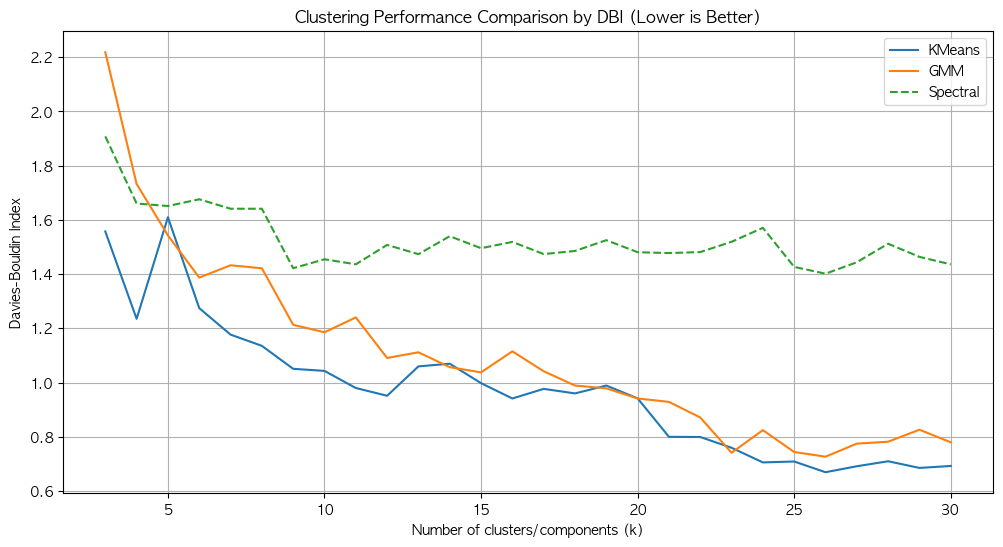

In [12]:
# Í≤∞Í≥º Ï†ÄÏû•
k_range = range(3, 31)

dbi_kmeans, dbi_gmm, dbi_spectral = [], [], []

labels_kmeans_all, labels_gmm_all, labels_spectral_all = {}, {}, {}

# Î∞òÎ≥µ ÏàòÌñâ
for k in k_range:
    # KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_labels_2020_2022 = kmeans.fit_predict(X_scaled_2020_2022)
    dbi_kmeans.append(davies_bouldin_score(X_scaled_df_2020_2022, kmeans_labels_2020_2022))
    labels_kmeans_all[k] = kmeans_labels_2020_2022

    # GMM
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels_2020_2022 = gmm.fit_predict(X_scaled_df_2020_2022)
    dbi_gmm.append(davies_bouldin_score(X_scaled_df_2020_2022, gmm_labels_2020_2022))
    labels_gmm_all[k] = gmm_labels_2020_2022

    # Spectral Clustering
    try:
        spectral = SpectralClustering(n_clusters=k, random_state=42, affinity='nearest_neighbors', assign_labels='kmeans')
        spectral_labels_2020_2022 = spectral.fit_predict(X_scaled_df_2020_2022)
        dbi_spectral.append(davies_bouldin_score(X_scaled_df_2020_2022, spectral_labels_2020_2022))
        labels_spectral_all[k] = spectral_labels_2020_2022

    except Exception:
        # Ïã§Ìå®Ìïú Í≤ΩÏö∞ ÌÅ∞ Í∞íÏúºÎ°ú ÎåÄÏ≤¥ (e.g., affinity Î¨∏Ï†ú Îì±)
        dbi_spectral.append(np.inf)
        labels_spectral_all[k] = None


# Í∞ÄÏû• ÎÇÆÏùÄ DBIÎ•º Î≥¥Ïù¥Îäî k Ï∞æÍ∏∞
best_k_kmeans = k_range[np.argmin(dbi_kmeans)]
best_k_gmm = k_range[np.argmin(dbi_gmm)]
best_k_spectral = k_range[np.argmin(dbi_spectral)]

min_dbi_kmeans = min(dbi_kmeans)
min_dbi_gmm = min(dbi_gmm)
min_dbi_spectral = min(dbi_spectral)

# 3. ÏÑ∏ Í∞í ÎπÑÍµêÌï¥ÏÑú ÏµúÏÜåÍ∞í Î∞è Î∞©Î≤ï ÏÑ†ÌÉù
dbi_dict = {
    'KMeans': (best_k_kmeans, min_dbi_kmeans),
    'GMM': (best_k_gmm, min_dbi_gmm),
    'Spectral': (best_k_spectral, min_dbi_spectral)
}

# Í≤∞Í≥º Ï∂úÎ†•
print(f"Best K for KMeans (lowest DBI): {best_k_kmeans} -> DBI = {min_dbi_kmeans:.4f}")
print(f"Best K for GMM (lowest DBI): {best_k_gmm} -> DBI = {min_dbi_gmm:.4f}")
print(f"Best K for Spectral Clustering (lowest DBI): {best_k_spectral} -> DBI = {min_dbi_spectral:.4f}")

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
plt.plot(k_range, dbi_kmeans, label='KMeans')
plt.plot(k_range, dbi_gmm, label='GMM')
plt.plot(k_range, dbi_spectral, label='Spectral', linestyle='--')
plt.xlabel('Number of clusters/components (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Clustering Performance Comparison by DBI (Lower is Better)')
plt.legend()
plt.grid(True)
plt.show()


### K-means, GMM, Sperctral Clustering Ï†ÅÏö© Î∞è ÎπÑÍµê

In [13]:
# # Window 2020-2022

# # K-means clustering
# # K-meansÎäî k=26ÏóêÏÑú Í∞ÄÏû• ÎÜíÏùÄ Ï†êÏàòÎ•º Î≥¥ÏûÑ
# kmeans = KMeans(n_clusters=26, random_state=42)
# kmeans_labels_2020_2022, kmeans_score_2020_2022 = evaluate_clustering(kmeans, X_scaled_df_2020_2022)

# # GMM
# # GMMÏùÄ k=29ÏóêÏÑú Í∞ÄÏû• ÎÜíÏùÄ Ï†êÏàòÎ•º Î≥¥ÏûÑ
# gmm = GaussianMixture(n_components=26, random_state=42)
# gmm_labels_2020_2022, gmm_score_2020_2022 = evaluate_clustering(gmm, X_scaled_df_2020_2022, labels=gmm.fit_predict(X_scaled_df_2020_2022))

# # Spectral clustering
# # Spectral clusteringÏùÄ Í±∞Ïùò Î™®Îì† kÏùò Î≤îÏúÑÏóêÏÑú ÌèâÍ∞ÄÍ∞Ä ÎÇÆÍ≤å ÎÇòÏò¥
# spectral = SpectralClustering(n_clusters=29, random_state=42, affinity='nearest_neighbors')
# spectral_labels_2020_2022, spectral_score_2020_2022 = evaluate_clustering(spectral, X_scaled_df_2020_2022)


# # Davies-Bouldin Index Í≥ÑÏÇ∞
# # Î≥¥ÌÜµ 0.5 ~ 1.0 ÏÇ¨Ïù¥Î©¥ Í¥úÏ∞ÆÏùÄ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏù¥ÎùºÍ≥† Ìï®. Ïã§Î¨¥ÏóêÏÑú ÏûêÏ£º ÎÇòÏò§Îäî ÏàòÏ§Ä
# kmeans_dbi_2020_2022 = davies_bouldin_score(X_scaled_df_2020_2022, kmeans_labels_2020_2022)
# gmm_dbi_2020_2022 = davies_bouldin_score(X_scaled_df_2020_2022, gmm_labels_2020_2022)
# spectral_dbi_2020_2022 = davies_bouldin_score(X_scaled_df_2020_2022, spectral_labels_2020_2022)

# # Í≤∞Í≥º ÎπÑÍµê Ï∂úÎ†•
# print(f"KMeans Davies-Bouldin Index: {kmeans_dbi_2020_2022:.4f}")
# print(f"GMM Davies-Bouldin Index: {gmm_dbi_2020_2022:.4f}")
# print(f"Spectral Davies-Bouldin Index: {spectral_dbi_2020_2022:.4f}")

# # # Í≤∞Í≥º ÎπÑÍµê
# # print(f"KMeans Silhouette Score: {kmeans_score:.4f}")
# # print(f"GMM Silhouette Score: {gmm_score:.4f}")
# # print(f"Spectral Silhouette Score: {spectral_score:.4f}")


### ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú ÏÑ†ÌÉùÌïú ÌÅ¥Îü¨Ïä§ÌÑ∞ Í≤∞Í≥º Ï†ÄÏû• (K-means)

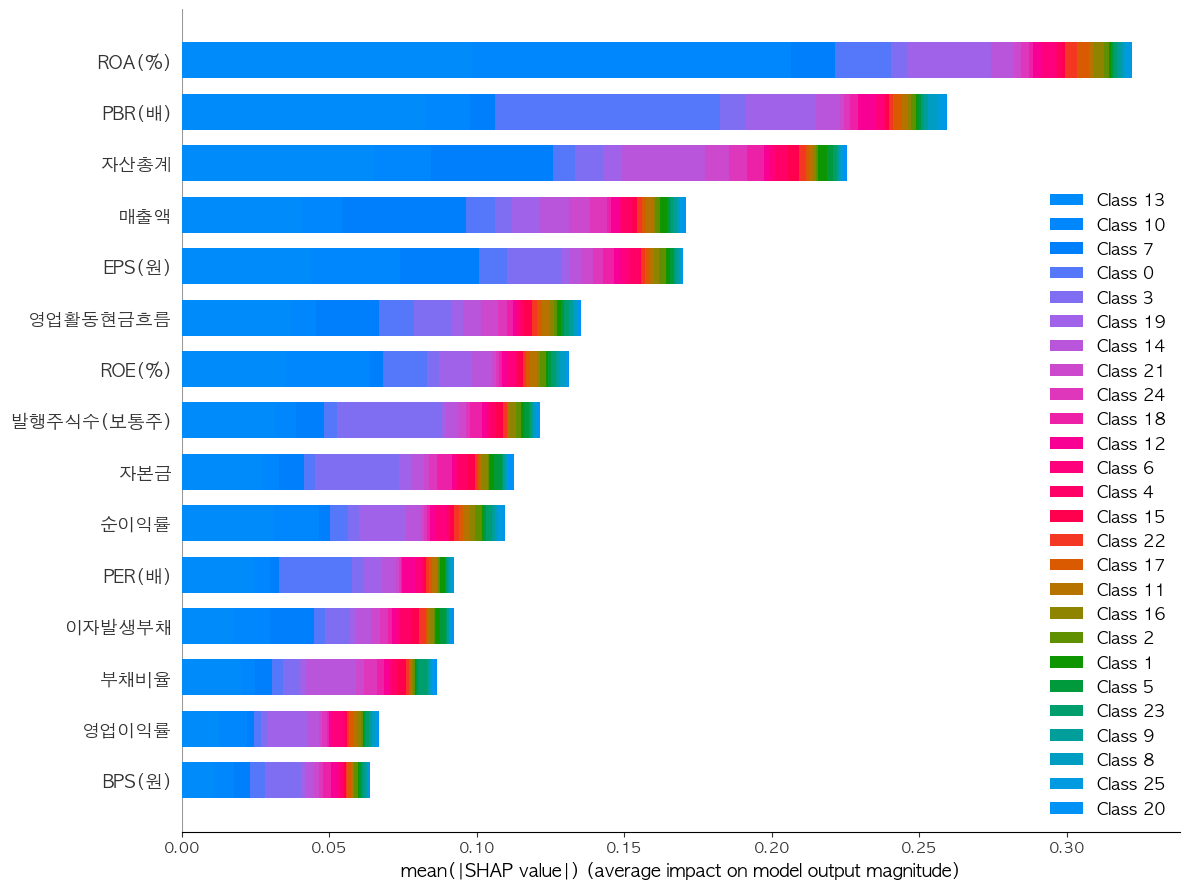

Ïã§Ï†ú ÏÇ¨Ïö©Îêú ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò: 26


In [14]:
best_method = min(dbi_dict, key=lambda k: dbi_dict[k][1])
best_k_method = dbi_dict[best_method][0]
best_dbi_value = dbi_dict[best_method][1]


if best_method == 'KMeans':
    final_labels = labels_kmeans_all[best_k_method]
elif best_method == 'GMM':
    final_labels = labels_gmm_all[best_k_method]
elif best_method == 'Spectral':
    final_labels = labels_spectral_all[best_k_method]


# Îç∞Ïù¥ÌÑ∞Ïóê ÎùºÎ≤® Î∂ÄÏ∞©
df_2020_2022['Cluster'] = final_labels

# ‚úÖ RandomForest ÌïôÏäµ
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_scaled_df_2020_2022, final_labels)

# ‚úÖ SHAP Î∂ÑÏÑù
explainer = shap.TreeExplainer(clf)
shap_values_2020_2022 = explainer.shap_values(X_scaled_df_2020_2022)

# ‚úÖ summary plot
shap.summary_plot(shap_values_2020_2022, X_scaled_df_2020_2022, plot_type="bar", show=False)
plt.gcf().set_size_inches(12, 9)
plt.tight_layout()
plt.show()

# ‚úÖ ÌôïÏù∏: Ïã§Ï†ú ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò
print("Ïã§Ï†ú ÏÇ¨Ïö©Îêú ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò:", len(np.unique(final_labels)))


In [15]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ SHAP Í∞íÏùò ÌèâÍ∑† Íµ¨ÌïòÍ∏∞
cluster_shap_means_2020_2022 = {}
unique_clusters = np.unique(final_labels)

for cluster_id in unique_clusters:
    # ÌòÑÏû¨ ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÏÜçÌïú Ïù∏Îç±Ïä§ Ï∂îÏ∂ú
    cluster_indices = np.where(final_labels == cluster_id)[0]
    
    # Ìï¥Îãπ ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÎåÄÌïú SHAP Í∞íÎßå ÏÑ†ÌÉù
    cluster_shap_values = shap_values_2020_2022[cluster_indices]
    
    # SHAP Í∞íÏùò Ï†àÎåÄÍ∞í ÌèâÍ∑† Í≥ÑÏÇ∞
    cluster_mean_shap = np.abs(cluster_shap_values).mean(axis=0)
    
    # 2Ï∞®Ïõê Î∞∞Ïó¥Ïù∏ Í≤ΩÏö∞ 1Ï∞®ÏõêÏúºÎ°ú Î≥ÄÌôò (Ï≤´ Î≤àÏß∏ Ï∞®ÏõêÎßå ÏÇ¨Ïö©ÌïòÍ±∞ÎÇò Ï†ÅÏ†àÌûà Ï≤òÎ¶¨)
    if len(cluster_mean_shap.shape) > 1:
        # Ï∞®ÏõêÏù¥ (14, 4)ÏôÄ Í∞ôÏù¥ 2Ï∞®ÏõêÏù∏ Í≤ΩÏö∞, Ï≤´ Î≤àÏß∏ Ï∞®ÏõêÎßå ÏÇ¨Ïö©ÌïòÍ±∞ÎÇò ÌèâÌÉÑÌôî
        cluster_mean_shap = cluster_mean_shap.flatten() if cluster_mean_shap.size == len(X_scaled_df_2020_2022.columns) else cluster_mean_shap[:, 0]
    
    # Í≤∞Í≥º Ï†ÄÏû•
    cluster_shap_means_2020_2022[cluster_id] = cluster_mean_shap

# Î™®Îì† ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú ÌäπÏÑ± Ï§ëÏöîÎèÑÎ•º DataFrameÏúºÎ°ú Î≥ÄÌôò
feature_importance_df = pd.DataFrame(index=X_scaled_df_2020_2022.columns)

# Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ Ï§ëÏöîÎèÑ Ï∂îÍ∞Ä
for cluster_id in unique_clusters:
    shap_arr = cluster_shap_means_2020_2022[cluster_id]
    # cluster_shap_means[cluster_id]Ïùò Í∏∏Ïù¥Í∞Ä X_raw.columnsÏôÄ ÏùºÏπòÌïòÎäîÏßÄ ÌôïÏù∏
    if len(shap_arr) != len(X_scaled_df_2020_2022.columns):
        print(f"Í≤ΩÍ≥†: ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster_id}Ïùò SHAP Í∞í Í∏∏Ïù¥({len(shap_arr)})Í∞Ä ÌäπÏÑ± Ïàò({len(X_scaled_df_2020_2022.columns)})ÏôÄ ÏùºÏπòÌïòÏßÄ ÏïäÏäµÎãàÎã§.")
        continue
    
    feature_importance_df[f'Class {cluster_id}'] = shap_arr

# Í≤∞Í≥º Ï∂úÎ†• - Í∞Å ÌÅ¥ÎûòÏä§Î≥ÑÎ°ú ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨Ìï¥ÏÑú Î≥¥Ïó¨Ï£ºÍ∏∞
print("Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ ÌäπÏÑ± Ï§ëÏöîÎèÑ (SHAP Í∞í ÌèâÍ∑†):")
display(feature_importance_df)

# Í∞Å ÌÅ¥ÎûòÏä§Î≥ÑÎ°ú Ï§ëÏöî ÌäπÏÑ± ÏàúÏúÑ ÌôïÏù∏
for cluster_id in unique_clusters:
    col = f'Class {cluster_id}'
    if col not in feature_importance_df.columns:
        print(f"\nClass {cluster_id}Ïóê ÎåÄÌïú ÌäπÏÑ± Ï§ëÏöîÎèÑÎ•º Í≥ÑÏÇ∞Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")
        continue
        
    print(f"\nClass {cluster_id}Ïóê Ï§ëÏöîÌïú ÌäπÏÑ± ÏàúÏúÑ:")
    sorted_feats = feature_importance_df[col].sort_values(ascending=False)
    for i, (feature, importance) in enumerate(sorted_feats.items(), 1):
        print(f"{i}. {feature}: {importance:.6f}")

Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ ÌäπÏÑ± Ï§ëÏöîÎèÑ (SHAP Í∞í ÌèâÍ∑†):


Class 0   Class 1   Class 2   Class 3   Class 4   Class 5  \
Îß§Ï∂úÏï°         0.034649  0.005724  0.002190  0.006032  0.007635  0.007906   
ÏûêÏÇ∞Ï¥ùÍ≥Ñ        0.035716  0.007165  0.002623  0.004873  0.009444  0.012711   
ÏûêÎ≥∏Í∏à         0.013728  0.005156  0.000406  0.011849  0.005571  0.012579   
ÏòÅÏóÖÌôúÎèôÌòÑÍ∏àÌùêÎ¶Ñ    0.041545  0.014381  0.001085  0.015329  0.009962  0.009960   
Ïù¥ÏûêÎ∞úÏÉùÎ∂ÄÏ±Ñ      0.016422  0.003418  0.000048  0.003389  0.005814  0.007796   
ÏòÅÏóÖÏù¥ÏùµÎ•†       0.009153  0.000312  0.001476  0.001161  0.000225  0.000880   
ÏàúÏù¥ÏùµÎ•†        0.021683  0.001962  0.000461  0.002848  0.001785  0.000274   
ROE(%)      0.051749  0.004490  0.007549  0.010962  0.002434  0.011170   
ROA(%)      0.056275  0.005384  0.005450  0.009395  0.005314  0.005730   
Î∂ÄÏ±ÑÎπÑÏú®        0.017602  0.001735  0.001435  0.003308  0.002675  0.003908   
EPS(Ïõê)      0.036303  0.009178  0.014503  0.006338  0.006595  0.006493   
PER(Î∞∞)      0.094356  0.009541  0.023898  0.018520  0.010189  0.012213   
BPS(Ïõê)      0.020099  0.001367  0.003424  0.004386  0.000786  0.000598   
PBR(Î∞∞)      0.324270  0.035213  0.052173  0.046725  0.031080  0.041715   
Î∞úÌñâÏ£ºÏãùÏàò(Î≥¥ÌÜµÏ£º)  0.017258  0.005638  0.002080  0.015224  0.007463  0.016157   

             Class 6   Class 7   Class 8   Class 9  ...  Class 16  Class 17  \
Îß§Ï∂úÏï°         0.002100  0.008788  0.029486  0.010690  ...  0.002804  0.014806   
ÏûêÏÇ∞Ï¥ùÍ≥Ñ        0.004747  0.006785  0.001380  0.000875  ...  0.000211  0.009462   
ÏûêÎ≥∏Í∏à         0.001967  0.001106  0.016445  0.001640  ...  0.004033  0.003790   
ÏòÅÏóÖÌôúÎèôÌòÑÍ∏àÌùêÎ¶Ñ    0.004829  0.013154  0.012986  0.010633  ...  0.008522  0.017874   
Ïù¥ÏûêÎ∞úÏÉùÎ∂ÄÏ±Ñ      0.002369  0.002732  0.008296  0.002884  ...  0.001746  0.001804   
ÏòÅÏóÖÏù¥ÏùµÎ•†       0.004238  0.000729  0.011225  0.009770  ...  0.000711  0.011898   
ÏàúÏù¥ÏùµÎ•†        0.017603  0.001265  0.027266  0.007443  ...  0.005422  0.033023   
ROE(%)      0.032353  0.005386  0.012614  0.003825  ...  0.008146  0.074805   
ROA(%)      0.057624  0.006177  0.019458  0.009175  ...  0.014090  0.141496   
Î∂ÄÏ±ÑÎπÑÏú®        0.002111  0.001273  0.023620  0.002418  ...  0.000460  0.004400   
EPS(Ïõê)      0.013530  0.008560  0.005158  0.010064  ...  0.005453  0.018906   
PER(Î∞∞)      0.012672  0.010654  0.025812  0.025830  ...  0.008491  0.054163   
BPS(Ïõê)      0.002680  0.002839  0.009911  0.011687  ...  0.000750  0.000473   
PBR(Î∞∞)      0.076867  0.035635  0.177844  0.068057  ...  0.019092  0.119532   
Î∞úÌñâÏ£ºÏãùÏàò(Î≥¥ÌÜµÏ£º)  0.002170  0.000885  0.007112  0.002172  ...  0.004532  0.004135   

            Class 18  Class 19  Class 20  Class 21  Class 22  Class 23  \
Îß§Ï∂úÏï°         0.006315  0.011069  0.008203  0.007890  0.002613  0.002700   
ÏûêÏÇ∞Ï¥ùÍ≥Ñ        0.009043  0.004362  0.011815  0.005690  0.004156  0.000892   
ÏûêÎ≥∏Í∏à         0.009804  0.001476  0.009338  0.002390  0.001360  0.002008   
ÏòÅÏóÖÌôúÎèôÌòÑÍ∏àÌùêÎ¶Ñ    0.013560  0.008068  0.010192  0.014308  0.008137  0.010250   
Ïù¥ÏûêÎ∞úÏÉùÎ∂ÄÏ±Ñ      0.002762  0.003768  0.007865  0.003195  0.001425  0.004894   
ÏòÅÏóÖÏù¥ÏùµÎ•†       0.000571  0.007100  0.000308  0.000536  0.000656  0.002044   
ÏàúÏù¥ÏùµÎ•†        0.000630  0.024516  0.002191  0.001346  0.005607  0.009615   
ROE(%)      0.003629  0.037252  0.003531  0.005372  0.008945  0.023238   
ROA(%)      0.005415  0.067556  0.006753  0.004717  0.015082  0.007983   
Î∂ÄÏ±ÑÎπÑÏú®        0.002308  0.004550  0.000303  0.002562  0.001109  0.000677   
EPS(Ïõê)      0.006426  0.012553  0.003993  0.009180  0.007681  0.007253   
PER(Î∞∞)      0.010664  0.016380  0.009651  0.009804  0.008611  0.019858   
BPS(Ïõê)      0.002206  0.003793  0.000236  0.001848  0.001617  0.006266   
PBR(Î∞∞)      0.034632  0.090296  0.037361  0.032481  0.018075  0.062480   
Î∞úÌñâÏ£ºÏãùÏàò(Î≥¥ÌÜµÏ£º)  0.010433  0.002387  0.009428  0.001388  0.001488  0.001331   

            Class 24  Class 25  
Îß§Ï∂úÏï°         0.007606  0.010020  
ÏûêÏÇ∞Ï¥ùÍ≥Ñ


Class 0Ïóê Ï§ëÏöîÌïú ÌäπÏÑ± ÏàúÏúÑ:
1. PBR(Î∞∞): 0.324270
2. PER(Î∞∞): 0.094356
3. ROA(%): 0.056275
4. ROE(%): 0.051749
5. ÏòÅÏóÖÌôúÎèôÌòÑÍ∏àÌùêÎ¶Ñ: 0.041545
6. EPS(Ïõê): 0.036303
7. ÏûêÏÇ∞Ï¥ùÍ≥Ñ: 0.035716
8. Îß§Ï∂úÏï°: 0.034649
9. ÏàúÏù¥ÏùµÎ•†: 0.021683
10. BPS(Ïõê): 0.020099
11. Î∂ÄÏ±ÑÎπÑÏú®: 0.017602
12. Î∞úÌñâÏ£ºÏãùÏàò(Î≥¥ÌÜµÏ£º): 0.017258
13. Ïù¥ÏûêÎ∞úÏÉùÎ∂ÄÏ±Ñ: 0.016422
14. ÏûêÎ≥∏Í∏à: 0.013728
15. ÏòÅÏóÖÏù¥ÏùµÎ•†: 0.009153

Class 1Ïóê Ï§ëÏöîÌïú ÌäπÏÑ± ÏàúÏúÑ:
1. PBR(Î∞∞): 0.035213
2. ÏòÅÏóÖÌôúÎèôÌòÑÍ∏àÌùêÎ¶Ñ: 0.014381
3. PER(Î∞∞): 0.009541
4. EPS(Ïõê): 0.009178
5. ÏûêÏÇ∞Ï¥ùÍ≥Ñ: 0.007165
6. Îß§Ï∂úÏï°: 0.005724
7. Î∞úÌñâÏ£ºÏãùÏàò(Î≥¥ÌÜµÏ£º): 0.005638
8. ROA(%): 0.005384
9. ÏûêÎ≥∏Í∏à: 0.005156
10. ROE(%): 0.004490
11. Ïù¥ÏûêÎ∞úÏÉùÎ∂ÄÏ±Ñ: 0.003418
12. ÏàúÏù¥ÏùµÎ•†: 0.001962
13. Î∂ÄÏ±ÑÎπÑÏú®: 0.001735
14. BPS(Ïõê): 0.001367
15. ÏòÅÏóÖÏù¥ÏùµÎ•†: 0.000312

Class 2Ïóê Ï§ëÏöîÌïú ÌäπÏÑ± ÏàúÏúÑ:
1. PBR(Î∞∞): 0.052173
2. PER(Î∞∞): 0.023898
3. EPS(Ïõê): 0.014503
4. ROE(%): 0.007549
5. ROA(%)

### ÏúÑÏóê Í≤∞Í≥ºÎ•º Î≥¥Î©¥ Í∞Å class Î≥ÑÎ°ú Ïûò Ï£ºÏöîÌïú featureÍ∞Ä ÎÇòÏò® Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

### Í∞Å clusterÏóê Ïñ¥Îñ§ Ï¢ÖÎ™©Ïù¥ Ìè¨Ìï®ÎêòÏñ¥ ÏûàÎäîÏßÄ ÌôïÏù∏

In [16]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Í∏∞ÏóÖ Î¶¨Ïä§Ìä∏Î•º Ï∂úÎ†•ÌïúÎã§.
for cluster_id in unique_clusters:
    print(f"[ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster_id}Ïóê ÏÜçÌïú Ï¢ÖÎ™©Îì§]:")
    stock_list = company_2020_2022[final_labels == cluster_id].values
    print(", ".join(stock_list))


[ÌÅ¥Îü¨Ïä§ÌÑ∞ 0Ïóê ÏÜçÌïú Ï¢ÖÎ™©Îì§]:
LGÏóêÎÑàÏßÄÏÜîÎ£®ÏÖò, SKÏïÑÏù¥Ïù¥ÌÖåÌÅ¨ÎÜÄÎ°úÏßÄ, ÎåÄÌïúÏ†ÑÏÑ†, ÎëêÏÇ∞Ìì®ÏñºÏÖÄ, Ïî®ÏóêÏä§ÏúàÎìú, ÏóòÏï§ÏóêÌîÑ, ÏùºÏßÑÌïòÏù¥ÏÜîÎ£®Ïä§, Ïπ¥Ïπ¥Ïò§ÌéòÏù¥, ÏΩîÏä§Î™®Ïã†ÏÜåÏû¨, ÏΩîÏä§Î™®ÌôîÌïô, Ìè¨Ïä§ÏΩîÌì®Ï≤òÏó†, ÌïòÏù¥Î∏å, ÌïúÎØ∏ÏÇ¨Ïù¥Ïñ∏Ïä§, ÌïúÎØ∏ÏïΩÌíà, ÌïúÏ†ÑÍ∏∞Ïà†, Ìò∏ÌÖîÏã†Îùº
[ÌÅ¥Îü¨Ïä§ÌÑ∞ 1Ïóê ÏÜçÌïú Ï¢ÖÎ™©Îì§]:
ÌòÑÎåÄÏ∞®
[ÌÅ¥Îü¨Ïä§ÌÑ∞ 2Ïóê ÏÜçÌïú Ï¢ÖÎ™©Îì§]:
ÌÉúÍ¥ëÏÇ∞ÏóÖ
[ÌÅ¥Îü¨Ïä§ÌÑ∞ 3Ïóê ÏÜçÌïú Ï¢ÖÎ™©Îì§]:
KT, LGÎîîÏä§ÌîåÎ†àÏù¥, LGÏú†ÌîåÎü¨Ïä§, NHÌà¨ÏûêÏ¶ùÍ∂å, Í∏àÌò∏ÌÉÄÏù¥Ïñ¥, ÎåÄÏö∞Í±¥ÏÑ§, ÎåÄÌïúÌï≠Í≥µ, ÎëêÏÇ∞ÏóêÎÑàÎπåÎ¶¨Ìã∞, ÏÇºÏÑ±Ï§ëÍ≥µÏóÖ, Ïπ¥Ïπ¥Ïò§Î±ÖÌÅ¨, Ìå¨Ïò§ÏÖò, ÌïúÏò®ÏãúÏä§ÌÖú
[ÌÅ¥Îü¨Ïä§ÌÑ∞ 4Ïóê ÏÜçÌïú Ï¢ÖÎ™©Îì§]:
KBÍ∏àÏúµ, Ïã†ÌïúÏßÄÏ£º
[ÌÅ¥Îü¨Ïä§ÌÑ∞ 5Ïóê ÏÜçÌïú Ï¢ÖÎ™©Îì§]:
ÌïúÍµ≠Ï†ÑÎ†•
[ÌÅ¥Îü¨Ïä§ÌÑ∞ 6Ïóê ÏÜçÌïú Ï¢ÖÎ™©Îì§]:
F&F, ÏóêÏä§ÎîîÎ∞îÏù¥Ïò§ÏÑºÏÑú
[ÌÅ¥Îü¨Ïä§ÌÑ∞ 7Ïóê ÏÜçÌïú Ï¢ÖÎ™©Îì§]:
CJ, CJÏ†úÏùºÏ†úÎãπ, DBÏÜêÌï¥Î≥¥Ìóò, GS, HDÌòÑÎåÄ, LGÏ†ÑÏûê, LGÌôîÌïô, S-Oil, SKÏù¥ÎÖ∏Î≤†Ïù¥ÏÖò, SKÌÖîÎ†àÏΩ§, Î©îÎ¶¨Ï∏†Í∏àÏúµÏßÄÏ£º, ÏÇºÏÑ±SDI,

### K-means ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥ºÏóê Ï¢ÖÎ™©Î™ÖÏùÑ Ìè¨Ìï®Ìï¥ÏÑú ÏãúÍ∞ÅÌôî

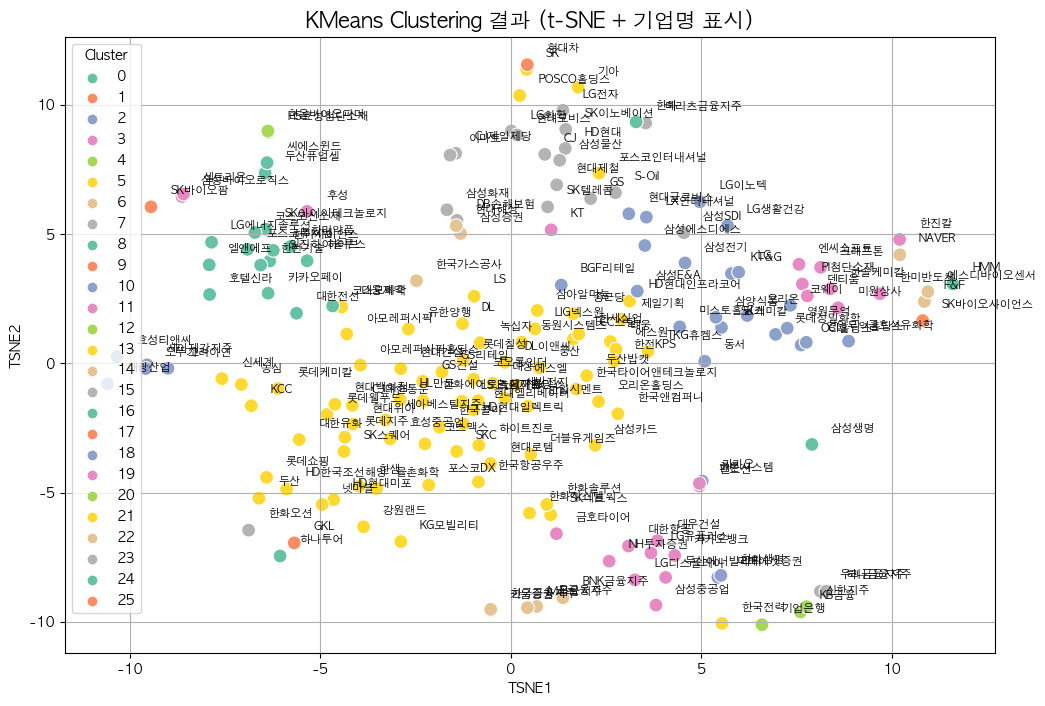

In [17]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled_df_2020_2022)

# Í≤∞Í≥º DataFrame ÏÉùÏÑ±
df_clustered = pd.DataFrame({
    'Í∏∞ÏóÖÎ™Ö': company_2020_2022.values,
    'Cluster': final_labels,  # ‚úÖ ÏûêÎèô ÏÑ†ÌÉùÎêú ÌÅ¥Îü¨Ïä§ÌÑ∞ ÎùºÎ≤® ÏÇ¨Ïö©
    'TSNE1': X_tsne[:, 0],
    'TSNE2': X_tsne[:, 1]
})

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clustered, x='TSNE1', y='TSNE2', hue='Cluster', palette='Set2', s=100)

# Í∏∞ÏóÖÎ™Ö ÎùºÎ≤® Ï∂îÍ∞Ä
for i in range(df_clustered.shape[0]):
    plt.text(df_clustered['TSNE1'][i]+0.5, df_clustered['TSNE2'][i]+0.5, df_clustered['Í∏∞ÏóÖÎ™Ö'][i], fontsize=8)

# Ï†úÎ™© Î∞è Ïä§ÌÉÄÏùº
plt.title(f"{best_method} Clustering Í≤∞Í≥º (t-SNE + Í∏∞ÏóÖÎ™Ö ÌëúÏãú)", fontsize=15)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


### „Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°

### ÏµúÏ†ÅÏùò K Ï∞æÍ∏∞ (2021-2023) - Í∑∏ÎûòÌîÑ

In [18]:
# ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä (VIF Í≥ÑÏÇ∞ Ïãú ÌïÑÏöî)
X_with_const = sm.add_constant(X_scaled_df_2021_2023)

# VIF Í≥ÑÏÇ∞
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
                   for i in range(X_with_const.shape[1])]

# Í≤∞Í≥º ÌôïÏù∏
vif_data.sort_values("VIF", ascending=False)

Feature        VIF
2         ÏòÅÏóÖÏù¥Ïùµ  31.819736
3        ÎãπÍ∏∞ÏàúÏù¥Ïùµ  30.261065
5         ÏûêÎ≥∏Ï¥ùÍ≥Ñ  13.197567
1          Îß§Ï∂úÏï°   9.038077
8       Ïù¥ÏûêÎ∞úÏÉùÎ∂ÄÏ±Ñ   7.892144
4         ÏûêÏÇ∞Ï¥ùÍ≥Ñ   7.690996
6          ÏûêÎ≥∏Í∏à   4.701214
12      ROA(%)   4.012625
18  Î∞úÌñâÏ£ºÏãùÏàò(Î≥¥ÌÜµÏ£º)   3.956254
14      EPS(Ïõê)   3.796829
7     ÏòÅÏóÖÌôúÎèôÌòÑÍ∏àÌùêÎ¶Ñ   3.624800
11      ROE(%)   3.541834
13        Î∂ÄÏ±ÑÎπÑÏú®   3.283663
16      BPS(Ïõê)   3.055135
9        ÏòÅÏóÖÏù¥ÏùµÎ•†   2.126059
10        ÏàúÏù¥ÏùµÎ•†   1.683406
17      PBR(Î∞∞)   1.596223
15      PER(Î∞∞)   1.410688
0        const   1.000000

In [19]:
# 'const' Ï†úÏô∏ÌïòÍ≥† VIF ‚â§ 10 Ïù∏ ÌîºÏ≤òÎßå ÏÑ†ÌÉù
vif_threshold = 10
valid_features = vif_data[(vif_data["Feature"] != "const") & (vif_data["VIF"] <= vif_threshold)]["Feature"]

# Ìï¥Îãπ ÌîºÏ≤òÎì§Îßå ÎÇ®Í∏¥ ÏÉàÎ°úÏö¥ DataFrame ÏÉùÏÑ±
X_scaled_df_2021_2023 = X_scaled_df_2021_2023[valid_features]


### ÏµúÏ†ÅÏùò K Ï∞æÍ∏∞ (2021-2023) - ÏûêÎèôÌôî

Best K for KMeans (lowest DBI): 28 -> DBI = 0.6729
Best K for GMM (lowest DBI): 30 -> DBI = 0.8020
Best K for Spectral Clustering (lowest DBI): 24 -> DBI = 1.3787


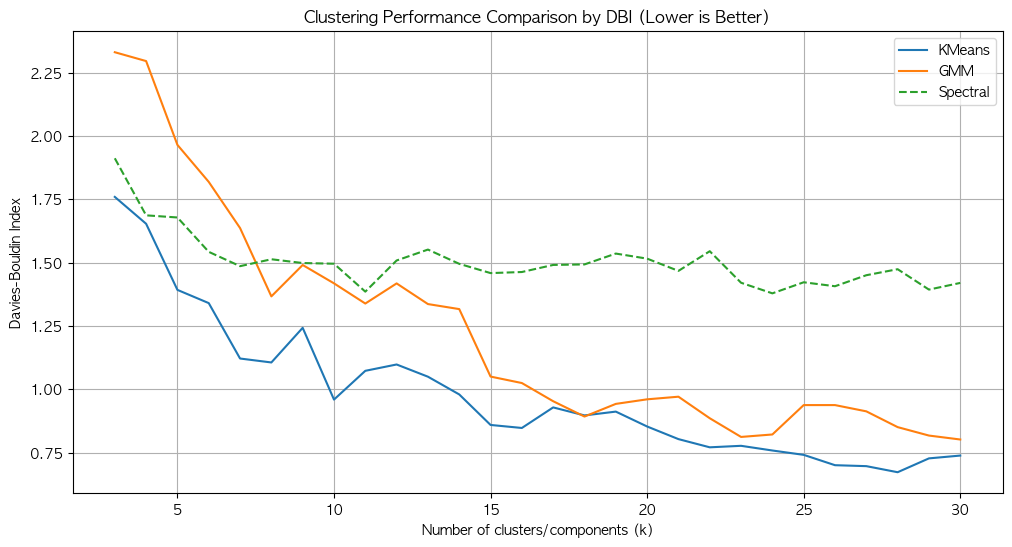

In [20]:
# Í≤∞Í≥º Ï†ÄÏû•
k_range = range(3, 31)

dbi_kmeans, dbi_gmm, dbi_spectral = [], [], []

labels_kmeans_all, labels_gmm_all, labels_spectral_all = {}, {}, {}

# Î∞òÎ≥µ ÏàòÌñâ
for k in k_range:
    # KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_labels_2021_2023 = kmeans.fit_predict(X_scaled_2021_2023)
    dbi_kmeans.append(davies_bouldin_score(X_scaled_df_2021_2023, kmeans_labels_2021_2023))
    labels_kmeans_all[k] = kmeans_labels_2021_2023

    # GMM
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels_2021_2023 = gmm.fit_predict(X_scaled_df_2021_2023)
    dbi_gmm.append(davies_bouldin_score(X_scaled_df_2021_2023, gmm_labels_2021_2023))
    labels_gmm_all[k] = gmm_labels_2021_2023

    # Spectral Clustering
    try:
        spectral = SpectralClustering(n_clusters=k, random_state=42, affinity='nearest_neighbors', assign_labels='kmeans')
        spectral_labels_2021_2023 = spectral.fit_predict(X_scaled_df_2021_2023)
        dbi_spectral.append(davies_bouldin_score(X_scaled_df_2021_2023, spectral_labels_2021_2023))
        labels_spectral_all[k] = spectral_labels_2021_2023

    except Exception:
        # Ïã§Ìå®Ìïú Í≤ΩÏö∞ ÌÅ∞ Í∞íÏúºÎ°ú ÎåÄÏ≤¥ (e.g., affinity Î¨∏Ï†ú Îì±)
        dbi_spectral.append(np.inf)
        labels_spectral_all[k] = None


# Í∞ÄÏû• ÎÇÆÏùÄ DBIÎ•º Î≥¥Ïù¥Îäî k Ï∞æÍ∏∞
best_k_kmeans = k_range[np.argmin(dbi_kmeans)]
best_k_gmm = k_range[np.argmin(dbi_gmm)]
best_k_spectral = k_range[np.argmin(dbi_spectral)]

min_dbi_kmeans = min(dbi_kmeans)
min_dbi_gmm = min(dbi_gmm)
min_dbi_spectral = min(dbi_spectral)

# 3. ÏÑ∏ Í∞í ÎπÑÍµêÌï¥ÏÑú ÏµúÏÜåÍ∞í Î∞è Î∞©Î≤ï ÏÑ†ÌÉù
dbi_dict = {
    'KMeans': (best_k_kmeans, min_dbi_kmeans),
    'GMM': (best_k_gmm, min_dbi_gmm),
    'Spectral': (best_k_spectral, min_dbi_spectral)
}

# Í≤∞Í≥º Ï∂úÎ†•
print(f"Best K for KMeans (lowest DBI): {best_k_kmeans} -> DBI = {min_dbi_kmeans:.4f}")
print(f"Best K for GMM (lowest DBI): {best_k_gmm} -> DBI = {min_dbi_gmm:.4f}")
print(f"Best K for Spectral Clustering (lowest DBI): {best_k_spectral} -> DBI = {min_dbi_spectral:.4f}")

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
plt.plot(k_range, dbi_kmeans, label='KMeans')
plt.plot(k_range, dbi_gmm, label='GMM')
plt.plot(k_range, dbi_spectral, label='Spectral', linestyle='--')
plt.xlabel('Number of clusters/components (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Clustering Performance Comparison by DBI (Lower is Better)')
plt.legend()
plt.grid(True)
plt.show()


### K-means, GMM, Sperctral Clustering Ï†ÅÏö© Î∞è ÎπÑÍµê

In [21]:
# # Window 2021-2023

# # K-means clustering
# # K-meansÎäî k=28ÏóêÏÑú Í∞ÄÏû• ÎÜíÏùÄ Ï†êÏàòÎ•º Î≥¥ÏûÑ
# kmeans = KMeans(n_clusters=28, random_state=42)
# kmeans_labels_2021_2023, kmeans_score_2021_2023 = evaluate_clustering(kmeans, X_scaled_df_2021_2023)

# # GMM
# # GMMÏùÄ k=28ÏóêÏÑú Í∞ÄÏû• ÎÜíÏùÄ Ï†êÏàòÎ•º Î≥¥ÏûÑ
# gmm = GaussianMixture(n_components=28, random_state=42)
# gmm_labels_2021_2023, gmm_score_2021_2023 = evaluate_clustering(gmm, X_scaled_df_2021_2023, labels=gmm.fit_predict(X_scaled_df_2021_2023))

# # Spectral clustering
# # Spectral clusteringÏùÄ Í±∞Ïùò Î™®Îì† kÏùò Î≤îÏúÑÏóêÏÑú ÌèâÍ∞ÄÍ∞Ä ÎÇÆÍ≤å ÎÇòÏò¥
# spectral = SpectralClustering(n_clusters=27, random_state=42, affinity='nearest_neighbors')
# spectral_labels_2021_2023, spectral_score_2021_2023 = evaluate_clustering(spectral, X_scaled_df_2021_2023)


# # Davies-Bouldin Index Í≥ÑÏÇ∞
# # Î≥¥ÌÜµ 0.5 ~ 1.0 ÏÇ¨Ïù¥Î©¥ Í¥úÏ∞ÆÏùÄ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏù¥ÎùºÍ≥† Ìï®. Ïã§Î¨¥ÏóêÏÑú ÏûêÏ£º ÎÇòÏò§Îäî ÏàòÏ§Ä
# kmeans_dbi_2021_2023 = davies_bouldin_score(X_scaled_df_2021_2023, kmeans_labels_2021_2023)
# gmm_dbi_2021_2023 = davies_bouldin_score(X_scaled_df_2021_2023, gmm_labels_2021_2023)
# spectral_dbi_2021_2023 = davies_bouldin_score(X_scaled_df_2021_2023, spectral_labels_2021_2023)

# # Í≤∞Í≥º ÎπÑÍµê Ï∂úÎ†•
# print(f"KMeans Davies-Bouldin Index: {kmeans_dbi_2021_2023:.4f}")
# print(f"GMM Davies-Bouldin Index: {gmm_dbi_2021_2023:.4f}")
# print(f"Spectral Davies-Bouldin Index: {spectral_dbi_2021_2023:.4f}")

# # # Í≤∞Í≥º ÎπÑÍµê
# # print(f"KMeans Silhouette Score: {kmeans_score:.4f}")
# # print(f"GMM Silhouette Score: {gmm_score:.4f}")
# # print(f"Spectral Silhouette Score: {spectral_score:.4f}")


### ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú ÏÑ†ÌÉùÌïú ÌÅ¥Îü¨Ïä§ÌÑ∞ Í≤∞Í≥º Ï†ÄÏû• (K-means)

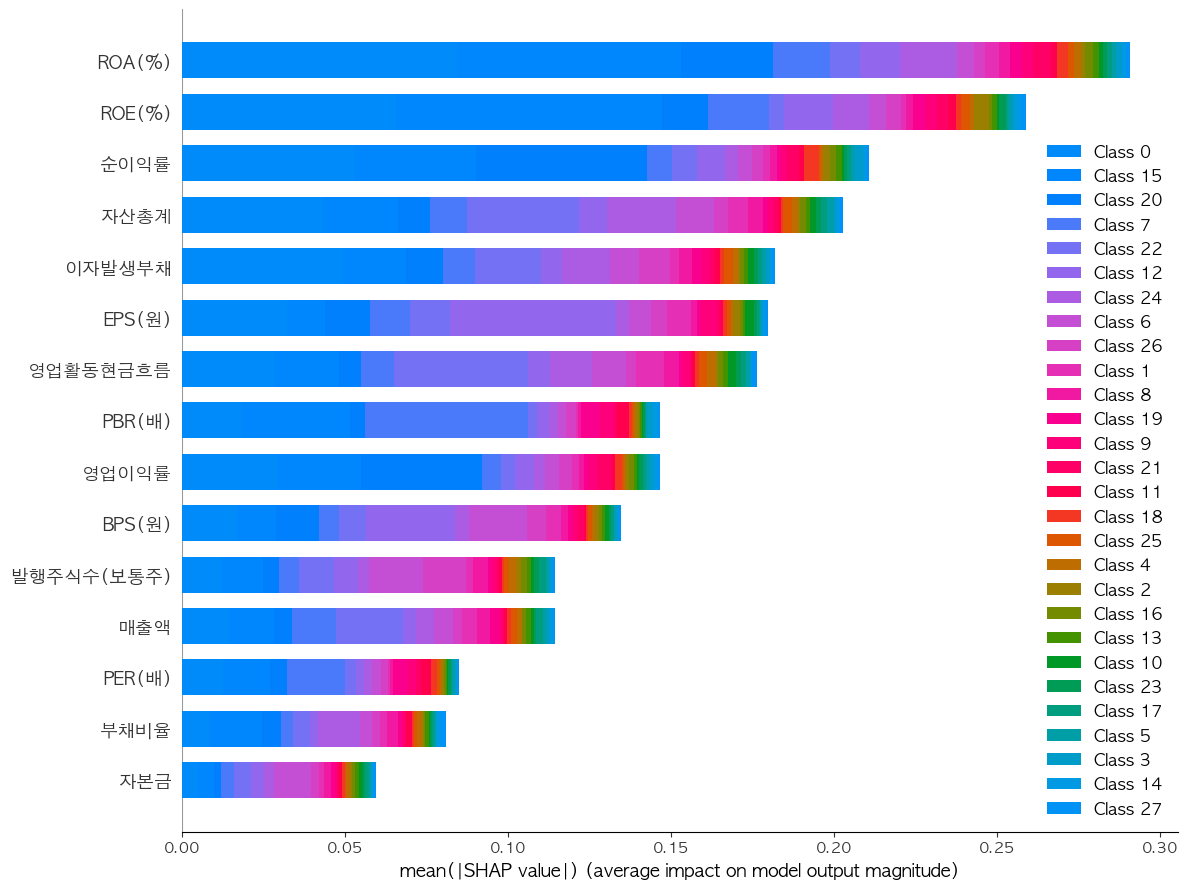

Ïã§Ï†ú ÏÇ¨Ïö©Îêú ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò: 28


In [22]:
best_method = min(dbi_dict, key=lambda k: dbi_dict[k][1])
best_k_method = dbi_dict[best_method][0]
best_dbi_value = dbi_dict[best_method][1]


if best_method == 'KMeans':
    final_labels = labels_kmeans_all[best_k_method]
elif best_method == 'GMM':
    final_labels = labels_gmm_all[best_k_method]
elif best_method == 'Spectral':
    final_labels = labels_spectral_all[best_k_method]


# Îç∞Ïù¥ÌÑ∞Ïóê ÎùºÎ≤® Î∂ÄÏ∞©
df_2021_2023['Cluster'] = final_labels

# ‚úÖ RandomForest ÌïôÏäµ
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_scaled_df_2021_2023, final_labels)

# ‚úÖ SHAP Î∂ÑÏÑù
explainer = shap.TreeExplainer(clf)
shap_values_2021_2023 = explainer.shap_values(X_scaled_df_2021_2023)

# ‚úÖ summary plot
shap.summary_plot(shap_values_2021_2023, X_scaled_df_2021_2023, plot_type="bar", show=False)
plt.gcf().set_size_inches(12, 9)
plt.tight_layout()
plt.show()

# ‚úÖ ÌôïÏù∏: Ïã§Ï†ú ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò
print("Ïã§Ï†ú ÏÇ¨Ïö©Îêú ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò:", len(np.unique(final_labels)))


In [23]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ SHAP Í∞íÏùò ÌèâÍ∑† Íµ¨ÌïòÍ∏∞
cluster_shap_means_2021_2023 = {}
unique_clusters = np.unique(final_labels)

for cluster_id in unique_clusters:
    # ÌòÑÏû¨ ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÏÜçÌïú Ïù∏Îç±Ïä§ Ï∂îÏ∂ú
    cluster_indices = np.where(final_labels == cluster_id)[0]
    
    # Ìï¥Îãπ ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÎåÄÌïú SHAP Í∞íÎßå ÏÑ†ÌÉù
    cluster_shap_values = shap_values_2021_2023[cluster_indices]
    
    # SHAP Í∞íÏùò Ï†àÎåÄÍ∞í ÌèâÍ∑† Í≥ÑÏÇ∞
    cluster_mean_shap = np.abs(cluster_shap_values).mean(axis=0)
    
    # 2Ï∞®Ïõê Î∞∞Ïó¥Ïù∏ Í≤ΩÏö∞ 1Ï∞®ÏõêÏúºÎ°ú Î≥ÄÌôò (Ï≤´ Î≤àÏß∏ Ï∞®ÏõêÎßå ÏÇ¨Ïö©ÌïòÍ±∞ÎÇò Ï†ÅÏ†àÌûà Ï≤òÎ¶¨)
    if len(cluster_mean_shap.shape) > 1:
        # Ï∞®ÏõêÏù¥ (14, 4)ÏôÄ Í∞ôÏù¥ 2Ï∞®ÏõêÏù∏ Í≤ΩÏö∞, Ï≤´ Î≤àÏß∏ Ï∞®ÏõêÎßå ÏÇ¨Ïö©ÌïòÍ±∞ÎÇò ÌèâÌÉÑÌôî
        cluster_mean_shap = cluster_mean_shap.flatten() if cluster_mean_shap.size == len(X_scaled_df_2021_2023.columns) else cluster_mean_shap[:, 0]
    
    # Í≤∞Í≥º Ï†ÄÏû•
    cluster_shap_means_2021_2023[cluster_id] = cluster_mean_shap

# Î™®Îì† ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú ÌäπÏÑ± Ï§ëÏöîÎèÑÎ•º DataFrameÏúºÎ°ú Î≥ÄÌôò
feature_importance_df = pd.DataFrame(index=X_scaled_df_2021_2023.columns)

# Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ Ï§ëÏöîÎèÑ Ï∂îÍ∞Ä
for cluster_id in unique_clusters:
    shap_arr = cluster_shap_means_2021_2023[cluster_id]
    # cluster_shap_means[cluster_id]Ïùò Í∏∏Ïù¥Í∞Ä X_raw.columnsÏôÄ ÏùºÏπòÌïòÎäîÏßÄ ÌôïÏù∏
    if len(shap_arr) != len(X_scaled_df_2021_2023.columns):
        print(f"Í≤ΩÍ≥†: ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster_id}Ïùò SHAP Í∞í Í∏∏Ïù¥({len(shap_arr)})Í∞Ä ÌäπÏÑ± Ïàò({len(X_scaled_df_2021_2023.columns)})ÏôÄ ÏùºÏπòÌïòÏßÄ ÏïäÏäµÎãàÎã§.")
        continue
    
    feature_importance_df[f'Class {cluster_id}'] = shap_arr

# Í≤∞Í≥º Ï∂úÎ†• - Í∞Å ÌÅ¥ÎûòÏä§Î≥ÑÎ°ú ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨Ìï¥ÏÑú Î≥¥Ïó¨Ï£ºÍ∏∞
print("Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ ÌäπÏÑ± Ï§ëÏöîÎèÑ (SHAP Í∞í ÌèâÍ∑†):")
display(feature_importance_df)

# Í∞Å ÌÅ¥ÎûòÏä§Î≥ÑÎ°ú Ï§ëÏöî ÌäπÏÑ± ÏàúÏúÑ ÌôïÏù∏
for cluster_id in unique_clusters:
    col = f'Class {cluster_id}'
    if col not in feature_importance_df.columns:
        print(f"\nClass {cluster_id}Ïóê ÎåÄÌïú ÌäπÏÑ± Ï§ëÏöîÎèÑÎ•º Í≥ÑÏÇ∞Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")
        continue
        
    print(f"\nClass {cluster_id}Ïóê Ï§ëÏöîÌïú ÌäπÏÑ± ÏàúÏúÑ:")
    sorted_feats = feature_importance_df[col].sort_values(ascending=False)
    for i, (feature, importance) in enumerate(sorted_feats.items(), 1):
        print(f"{i}. {feature}: {importance:.6f}")

Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ ÌäπÏÑ± Ï§ëÏöîÎèÑ (SHAP Í∞í ÌèâÍ∑†):


Class 0   Class 1   Class 2   Class 3   Class 4   Class 5  \
Îß§Ï∂úÏï°         0.021763  0.024600  0.010055  0.026744  0.012346  0.007695   
ÏûêÏÇ∞Ï¥ùÍ≥Ñ        0.056487  0.097560  0.017843  0.005949  0.077369  0.046900   
ÏûêÎ≥∏Í∏à         0.007779  0.003003  0.000664  0.000988  0.008960  0.006192   
ÏòÅÏóÖÌôúÎèôÌòÑÍ∏àÌùêÎ¶Ñ    0.041254  0.084365  0.013896  0.010376  0.044933  0.002759   
Ïù¥ÏûêÎ∞úÏÉùÎ∂ÄÏ±Ñ      0.065792  0.063988  0.032064  0.011418  0.088809  0.049602   
ÏòÅÏóÖÏù¥ÏùµÎ•†       0.044763  0.012552  0.000897  0.073608  0.005988  0.000182   
ÏàúÏù¥ÏùµÎ•†        0.075749  0.024688  0.028690  0.117085  0.020863  0.005835   
ROE(%)      0.087327  0.023368  0.093632  0.014194  0.034373  0.052304   
ROA(%)      0.124312  0.045070  0.053073  0.039331  0.045352  0.054090   
Î∂ÄÏ±ÑÎπÑÏú®        0.013568  0.000860  0.016114  0.005738  0.004466  0.006055   
EPS(Ïõê)      0.046213  0.052763  0.069509  0.012410  0.010565  0.010272   
PER(Î∞∞)      0.016598  0.003575  0.005684  0.004591  0.005158  0.006967   
BPS(Ïõê)      0.024719  0.048167  0.040490  0.004064  0.002997  0.001464   
PBR(Î∞∞)      0.026926  0.005625  0.001092  0.042682  0.000455  0.003330   
Î∞úÌñâÏ£ºÏãùÏàò(Î≥¥ÌÜµÏ£º)  0.017890  0.005199  0.023740  0.002079  0.037071  0.027638   

             Class 6   Class 7   Class 8   Class 9  ...  Class 18  Class 19  \
Îß§Ï∂úÏï°         0.003075  0.028464  0.012044  0.014279  ...  0.044011  0.024645   
ÏûêÏÇ∞Ï¥ùÍ≥Ñ        0.064245  0.011734  0.075666  0.004211  ...  0.022810  0.010457   
ÏûêÎ≥∏Í∏à         0.019002  0.001979  0.007652  0.001477  ...  0.000610  0.000569   
ÏòÅÏóÖÌôúÎèôÌòÑÍ∏àÌùêÎ¶Ñ    0.038948  0.008930  0.043934  0.011068  ...  0.018472  0.003237   
Ïù¥ÏûêÎ∞úÏÉùÎ∂ÄÏ±Ñ      0.076992  0.022723  0.082997  0.007216  ...  0.026628  0.017260   
ÏòÅÏóÖÏù¥ÏùµÎ•†       0.015688  0.008370  0.018420  0.038086  ...  0.016635  0.002278   
ÏàúÏù¥ÏùµÎ•†        0.022612  0.027301  0.025647  0.048517  ...  0.202042  0.012862   
ROE(%)      0.035515  0.077193  0.029679  0.041628  ...  0.028760  0.081137   
ROA(%)      0.054246  0.071528  0.042462  0.046794  ...  0.083209  0.073942   
Î∂ÄÏ±ÑÎπÑÏú®        0.005736  0.005973  0.005491  0.001044  ...  0.001320  0.003120   
EPS(Ïõê)      0.009861  0.025370  0.008890  0.031298  ...  0.019034  0.023571   
PER(Î∞∞)      0.006328  0.039795  0.001309  0.047086  ...  0.010905  0.038055   
BPS(Ïõê)      0.004964  0.004876  0.003231  0.012427  ...  0.003165  0.006573   
PBR(Î∞∞)      0.003938  0.057684  0.001222  0.115062  ...  0.007086  0.045054   
Î∞úÌñâÏ£ºÏãùÏàò(Î≥¥ÌÜµÏ£º)  0.048376  0.003305  0.024382  0.004761  ...  0.007645  0.004382   

            Class 20  Class 21  Class 22  Class 23  Class 24  Class 25  \
Îß§Ï∂úÏï°         0.014548  0.008506  0.017353  0.000764  0.003751  0.009573   
ÏûêÏÇ∞Ï¥ùÍ≥Ñ        0.020446  0.017825  0.092258  0.040182  0.089066  0.052585   
ÏûêÎ≥∏Í∏à         0.002490  0.000827  0.003384  0.006375  0.003853  0.002035   
ÏòÅÏóÖÌôúÎèôÌòÑÍ∏àÌùêÎ¶Ñ    0.014443  0.009974  0.077998  0.032769  0.009876  0.043675   
Ïù¥ÏûêÎ∞úÏÉùÎ∂ÄÏ±Ñ      0.025235  0.022281  0.079804  0.053007  0.089814  0.048514   
ÏòÅÏóÖÏù¥ÏùµÎ•†       0.087681  0.107778  0.011938  0.000040  0.016924  0.007506   
ÏàúÏù¥ÏùµÎ•†        0.139724  0.150134  0.020105  0.012732  0.025347  0.003128   
ROE(%)      0.029297  0.013052  0.038406  0.050429  0.043892  0.054735   
ROA(%)      0.066143  0.067539  0.048666  0.044840  0.084814  0.045441   
Î∂ÄÏ±ÑÎπÑÏú®        0.016244  0.006357  0.004625  0.004182  0.022299  0.001000   
EPS(Ïõê)      0.015250  0.009687  0.015824  0.006660  0.012742  0.011531   
PER(Î∞∞)      0.005724  0.002452  0.006348  0.003998  0.004179  0.004859   
BPS(Ïõê)      0.006178  0.012207  0.009458  0.003533  0.006252  0.020949   
PBR(Î∞∞)      0.011664  0.013885  0.007549  0.004368  0.002802  0.001694   
Î∞úÌñâÏ£ºÏãùÏàò(Î≥¥ÌÜµÏ£º)  0.004204  0.003334  0.005194  0.021039  0.008819  0.004539   

            Class 26  Class 27  
Îß§Ï∂úÏï°         0.003147  0.000694  
ÏûêÏÇ∞Ï¥ùÍ≥Ñ


Class 0Ïóê Ï§ëÏöîÌïú ÌäπÏÑ± ÏàúÏúÑ:
1. ROA(%): 0.124312
2. ROE(%): 0.087327
3. ÏàúÏù¥ÏùµÎ•†: 0.075749
4. Ïù¥ÏûêÎ∞úÏÉùÎ∂ÄÏ±Ñ: 0.065792
5. ÏûêÏÇ∞Ï¥ùÍ≥Ñ: 0.056487
6. EPS(Ïõê): 0.046213
7. ÏòÅÏóÖÏù¥ÏùµÎ•†: 0.044763
8. ÏòÅÏóÖÌôúÎèôÌòÑÍ∏àÌùêÎ¶Ñ: 0.041254
9. PBR(Î∞∞): 0.026926
10. BPS(Ïõê): 0.024719
11. Îß§Ï∂úÏï°: 0.021763
12. Î∞úÌñâÏ£ºÏãùÏàò(Î≥¥ÌÜµÏ£º): 0.017890
13. PER(Î∞∞): 0.016598
14. Î∂ÄÏ±ÑÎπÑÏú®: 0.013568
15. ÏûêÎ≥∏Í∏à: 0.007779

Class 1Ïóê Ï§ëÏöîÌïú ÌäπÏÑ± ÏàúÏúÑ:
1. ÏûêÏÇ∞Ï¥ùÍ≥Ñ: 0.097560
2. ÏòÅÏóÖÌôúÎèôÌòÑÍ∏àÌùêÎ¶Ñ: 0.084365
3. Ïù¥ÏûêÎ∞úÏÉùÎ∂ÄÏ±Ñ: 0.063988
4. EPS(Ïõê): 0.052763
5. BPS(Ïõê): 0.048167
6. ROA(%): 0.045070
7. ÏàúÏù¥ÏùµÎ•†: 0.024688
8. Îß§Ï∂úÏï°: 0.024600
9. ROE(%): 0.023368
10. ÏòÅÏóÖÏù¥ÏùµÎ•†: 0.012552
11. PBR(Î∞∞): 0.005625
12. Î∞úÌñâÏ£ºÏãùÏàò(Î≥¥ÌÜµÏ£º): 0.005199
13. PER(Î∞∞): 0.003575
14. ÏûêÎ≥∏Í∏à: 0.003003
15. Î∂ÄÏ±ÑÎπÑÏú®: 0.000860

Class 2Ïóê Ï§ëÏöîÌïú ÌäπÏÑ± ÏàúÏúÑ:
1. ROE(%): 0.093632
2. EPS(Ïõê): 0.069509
3. ROA(%): 0.053073
4. BPS(Ïõê): 0.040490
5. Ïù¥ÏûêÎ∞

### ÏúÑÏóê Í≤∞Í≥ºÎ•º Î≥¥Î©¥ Í∞Å class Î≥ÑÎ°ú Ïûò Ï£ºÏöîÌïú featureÍ∞Ä ÎÇòÏò® Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

In [24]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Í∏∞ÏóÖ Î¶¨Ïä§Ìä∏Î•º Ï∂úÎ†•ÌïúÎã§.
for cluster_id in unique_clusters:
    print(f"[ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster_id}Ïóê ÏÜçÌïú Ï¢ÖÎ™©Îì§]:")
    stock_list = company_2021_2023[final_labels == cluster_id].values
    print(", ".join(stock_list))


[ÌÅ¥Îü¨Ïä§ÌÑ∞ 0Ïóê ÏÜçÌïú Ï¢ÖÎ™©Îì§]:
BGFÎ¶¨ÌÖåÏùº, DLÏù¥Ïï§Ïî®, HDÌòÑÎåÄÏù∏ÌîÑÎùºÏΩîÏñ¥, HDÌòÑÎåÄÏùºÎ†âÌä∏Î¶≠, HSÌö®ÏÑ±Ï≤®Îã®ÏÜåÏû¨, KGÎ™®ÎπåÎ¶¨Ìã∞, LGÏÉùÌôúÍ±¥Í∞ï, LIGÎÑ•Ïä§Ïõê, LS, LS ELECTRIC, LXÏù∏ÌÑ∞ÎÇ¥ÏÖîÎÑê, PIÏ≤®Îã®ÏÜåÏû¨, SKÏºÄÎØ∏Ïπº, TKGÌú¥ÏºêÏä§, Í∞ïÏõêÎûúÎìú, ÎÜçÏã¨, ÎåÄÏõÖ, ÎåÄÏõÖÏ†úÏïΩ, ÎåÄÌïúÏ†ÑÏÑ†, ÎèôÏõêÏãúÏä§ÌÖúÏ¶à, ÎëêÏÇ∞Î∞•Ï∫£, Î°ØÎç∞Ïπ†ÏÑ±, ÎØ∏Ïä§ÌÜ†ÌôÄÎî©Ïä§, ÏÇºÏÑ±E&A, ÏÇºÏÑ±ÏóêÏä§ÎîîÏóêÏä§, ÏÇºÏÑ±Ï†ÑÍ∏∞, ÏÑ∏Î∞©Ï†ÑÏßÄ, ÏÑ∏ÏïÑÎ≤†Ïä§Ìã∏ÏßÄÏ£º, ÏóêÏä§Ïóò, ÏóêÏä§Ïõê, Ïò§Î¶¨Ïò®ÌôÄÎî©Ïä§, Ïú†ÌïúÏñëÌñâ, Ï†úÏùºÍ∏∞Ìöç, ÏΩîÏä§Îß•Ïä§, Ìè¨Ïä§ÏΩîÏù∏ÌÑ∞ÎÇ¥ÏÖîÎÑê, ÌíçÏÇ∞, ÌïúÍµ≠ÌÉÄÏù¥Ïñ¥Ïï§ÌÖåÌÅ¨ÎÜÄÎ°úÏßÄ, ÌïúÍµ≠Ìï≠Í≥µÏö∞Ï£º, ÌïúÎØ∏ÏÇ¨Ïù¥Ïñ∏Ïä§, ÌïúÎØ∏ÏïΩÌíà, ÌïúÏÑ∏Ïã§ÏóÖ, ÌïúÏùºÏãúÎ©òÌä∏, ÌïúÏ†ÑKPS, ÌïúÌôîÏãúÏä§ÌÖú, ÌïúÌôîÏóêÏñ¥Î°úÏä§ÌéòÏù¥Ïä§, ÌòÑÎåÄÍ∏ÄÎ°úÎπÑÏä§, ÌòÑÎåÄÎ°úÌÖú, ÌòÑÎåÄÏóòÎ¶¨Î≤†Ïù¥ÌÑ∞, ÌòÑÎåÄÌï¥ÏÉÅ, Ìö®ÏÑ±Ï§ëÍ≥µÏóÖ
[ÌÅ¥Îü¨Ïä§ÌÑ∞ 1Ïóê ÏÜçÌïú Ï¢ÖÎ™©Îì§]:
LGÌôîÌïô, POSCOÌôÄÎî©Ïä§, ÌòÑÎåÄÎ™®ÎπÑÏä§
[ÌÅ¥Îü¨Ïä§ÌÑ∞ 2Ïóê ÏÜçÌïú Ï¢ÖÎ™©Îì§]:
ÌÉúÍ¥ëÏÇ∞ÏóÖ
[ÌÅ¥Îü¨Ïä§ÌÑ∞ 3Ïó

### K-means ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥ºÏóê Ï¢ÖÎ™©Î™ÖÏùÑ Ìè¨Ìï®Ìï¥ÏÑú ÏãúÍ∞ÅÌôî

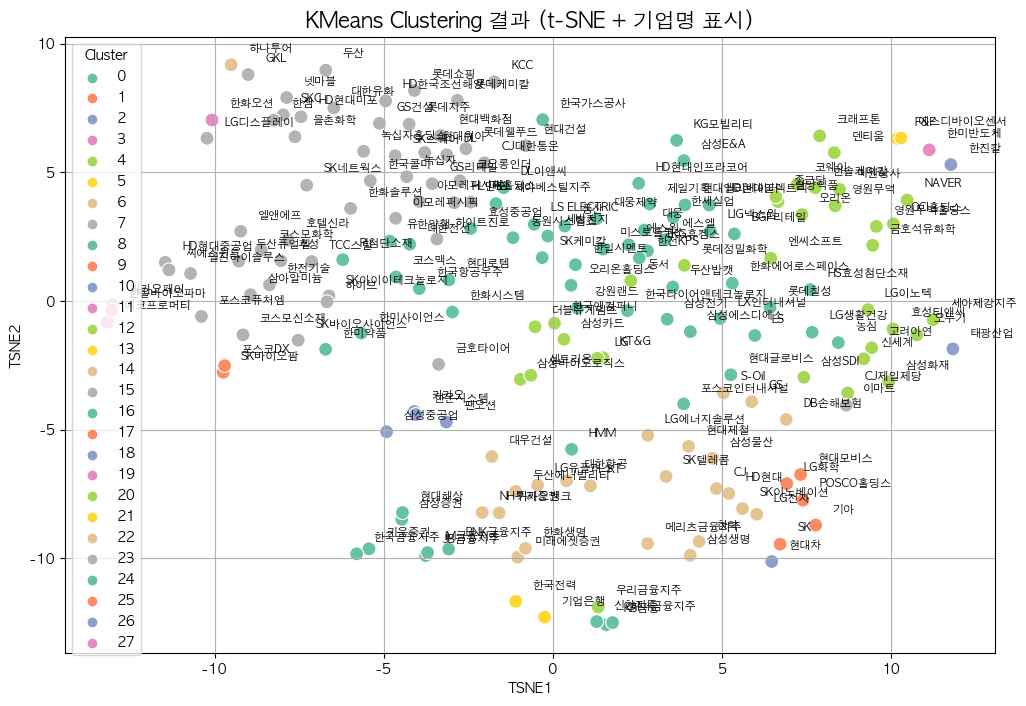

In [25]:
# t-SNE Ï†ÅÏö©
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled_df_2021_2023)

# Í≤∞Í≥º DataFrame ÏÉùÏÑ±
df_clustered = pd.DataFrame({
    'Í∏∞ÏóÖÎ™Ö': company_2021_2023.values,
    'Cluster': final_labels,
    'TSNE1': X_tsne[:, 0],
    'TSNE2': X_tsne[:, 1]
})

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clustered, x='TSNE1', y='TSNE2', hue='Cluster', palette='Set2', s=100)

# Í∏∞ÏóÖÎ™Ö ÎùºÎ≤® Ï∂îÍ∞Ä
for i in range(df_clustered.shape[0]):
    plt.text(df_clustered['TSNE1'][i]+0.5, df_clustered['TSNE2'][i]+0.5, df_clustered['Í∏∞ÏóÖÎ™Ö'][i], fontsize=8)

# Ï†úÎ™© Î∞è Ïä§ÌÉÄÏùº
plt.title("KMeans Clustering Í≤∞Í≥º (t-SNE + Í∏∞ÏóÖÎ™Ö ÌëúÏãú)", fontsize=15)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


### „Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°„Ö°

### ÏµúÏ†ÅÏùò K Ï∞æÍ∏∞ (2022-2024) - Í∑∏ÎûòÌîÑ

In [26]:
# ÏÉÅÏàòÌï≠ Ï∂îÍ∞Ä (VIF Í≥ÑÏÇ∞ Ïãú ÌïÑÏöî)
X_with_const = sm.add_constant(X_scaled_df_2022_2024)

# VIF Í≥ÑÏÇ∞
vif_data = pd.DataFrame()
vif_data["Feature"] = X_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_with_const.values, i) 
                   for i in range(X_with_const.shape[1])]

# Í≤∞Í≥º ÌôïÏù∏
vif_data.sort_values("VIF", ascending=False)

Feature        VIF
2         ÏòÅÏóÖÏù¥Ïùµ  32.017576
3        ÎãπÍ∏∞ÏàúÏù¥Ïùµ  28.701173
5         ÏûêÎ≥∏Ï¥ùÍ≥Ñ  15.183636
1          Îß§Ï∂úÏï°  12.047871
8       Ïù¥ÏûêÎ∞úÏÉùÎ∂ÄÏ±Ñ   8.734619
4         ÏûêÏÇ∞Ï¥ùÍ≥Ñ   7.836410
12      ROA(%)   7.623210
11      ROE(%)   5.614654
14      EPS(Ïõê)   5.285805
6          ÏûêÎ≥∏Í∏à   4.632521
16      BPS(Ïõê)   4.361176
13        Î∂ÄÏ±ÑÎπÑÏú®   4.240969
18  Î∞úÌñâÏ£ºÏãùÏàò(Î≥¥ÌÜµÏ£º)   3.908226
7     ÏòÅÏóÖÌôúÎèôÌòÑÍ∏àÌùêÎ¶Ñ   3.337653
9        ÏòÅÏóÖÏù¥ÏùµÎ•†   3.311558
17      PBR(Î∞∞)   1.716288
10        ÏàúÏù¥ÏùµÎ•†   1.646942
15      PER(Î∞∞)   1.383444
0        const   1.000000

In [27]:
# 'const' Ï†úÏô∏ÌïòÍ≥† VIF ‚â§ 10 Ïù∏ ÌîºÏ≤òÎßå ÏÑ†ÌÉù
vif_threshold = 10
valid_features = vif_data[(vif_data["Feature"] != "const") & (vif_data["VIF"] <= vif_threshold)]["Feature"]

# Ìï¥Îãπ ÌîºÏ≤òÎì§Îßå ÎÇ®Í∏¥ ÏÉàÎ°úÏö¥ DataFrame ÏÉùÏÑ±
X_scaled_df_2022_2024 = X_scaled_df_2022_2024[valid_features]


### ÏµúÏ†ÅÏùò K Ï∞æÍ∏∞ (2022-2024) - ÏûêÎèôÌôî

Best K for KMeans (lowest DBI): 22 -> DBI = 0.8120
Best K for GMM (lowest DBI): 19 -> DBI = 0.9126
Best K for Spectral Clustering (lowest DBI): 12 -> DBI = 1.3708


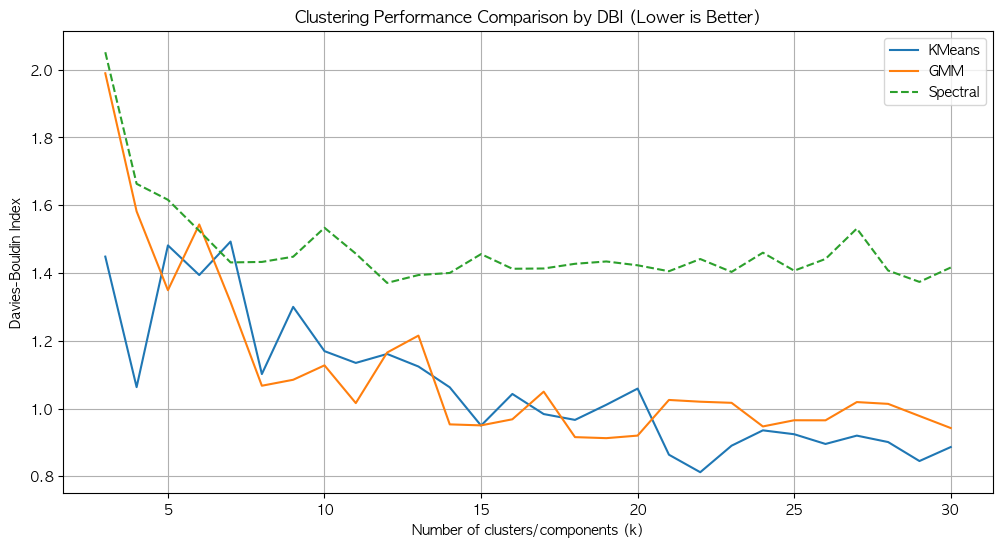

In [28]:
# Í≤∞Í≥º Ï†ÄÏû•
k_range = range(3, 31)

dbi_kmeans, dbi_gmm, dbi_spectral = [], [], []

labels_kmeans_all, labels_gmm_all, labels_spectral_all = {}, {}, {}

# Î∞òÎ≥µ ÏàòÌñâ
for k in k_range:
    # KMeans
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans_labels_2022_2024 = kmeans.fit_predict(X_scaled_2022_2024)
    dbi_kmeans.append(davies_bouldin_score(X_scaled_df_2022_2024, kmeans_labels_2022_2024))
    labels_kmeans_all[k] = kmeans_labels_2022_2024

    # GMM
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm_labels_2022_2024 = gmm.fit_predict(X_scaled_df_2022_2024)
    dbi_gmm.append(davies_bouldin_score(X_scaled_df_2022_2024, gmm_labels_2022_2024))
    labels_gmm_all[k] = gmm_labels_2022_2024

    # Spectral Clustering
    try:
        spectral = SpectralClustering(n_clusters=k, random_state=42, affinity='nearest_neighbors', assign_labels='kmeans')
        spectral_labels_2022_2024 = spectral.fit_predict(X_scaled_df_2022_2024)
        dbi_spectral.append(davies_bouldin_score(X_scaled_df_2022_2024, spectral_labels_2022_2024))
        labels_spectral_all[k] = spectral_labels_2022_2024

    except Exception:
        # Ïã§Ìå®Ìïú Í≤ΩÏö∞ ÌÅ∞ Í∞íÏúºÎ°ú ÎåÄÏ≤¥ (e.g., affinity Î¨∏Ï†ú Îì±)
        dbi_spectral.append(np.inf)
        labels_spectral_all[k] = None


# Í∞ÄÏû• ÎÇÆÏùÄ DBIÎ•º Î≥¥Ïù¥Îäî k Ï∞æÍ∏∞
best_k_kmeans = k_range[np.argmin(dbi_kmeans)]
best_k_gmm = k_range[np.argmin(dbi_gmm)]
best_k_spectral = k_range[np.argmin(dbi_spectral)]

min_dbi_kmeans = min(dbi_kmeans)
min_dbi_gmm = min(dbi_gmm)
min_dbi_spectral = min(dbi_spectral)

# 3. ÏÑ∏ Í∞í ÎπÑÍµêÌï¥ÏÑú ÏµúÏÜåÍ∞í Î∞è Î∞©Î≤ï ÏÑ†ÌÉù
dbi_dict = {
    'KMeans': (best_k_kmeans, min_dbi_kmeans),
    'GMM': (best_k_gmm, min_dbi_gmm),
    'Spectral': (best_k_spectral, min_dbi_spectral)
}

# Í≤∞Í≥º Ï∂úÎ†•
print(f"Best K for KMeans (lowest DBI): {best_k_kmeans} -> DBI = {min_dbi_kmeans:.4f}")
print(f"Best K for GMM (lowest DBI): {best_k_gmm} -> DBI = {min_dbi_gmm:.4f}")
print(f"Best K for Spectral Clustering (lowest DBI): {best_k_spectral} -> DBI = {min_dbi_spectral:.4f}")

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 6))
plt.plot(k_range, dbi_kmeans, label='KMeans')
plt.plot(k_range, dbi_gmm, label='GMM')
plt.plot(k_range, dbi_spectral, label='Spectral', linestyle='--')
plt.xlabel('Number of clusters/components (k)')
plt.ylabel('Davies-Bouldin Index')
plt.title('Clustering Performance Comparison by DBI (Lower is Better)')
plt.legend()
plt.grid(True)
plt.show()


### K-means, GMM, Sperctral Clustering Ï†ÅÏö© Î∞è ÎπÑÍµê

In [29]:
# # Window 2021-2023

# # K-means clustering
# # K-meansÎäî k=3ÏóêÏÑú Í∞ÄÏû• ÎÜíÏùÄ Ï†êÏàòÎ•º Î≥¥ÏûÑ
# kmeans = KMeans(n_clusters=3, random_state=42)
# kmeans_labels_2022_2024, kmeans_score_2022_2024 = evaluate_clustering(kmeans, X_scaled_df_2022_2024)

# # GMM
# # GMMÏùÄ k=23ÏóêÏÑú Í∞ÄÏû• ÎÜíÏùÄ Ï†êÏàòÎ•º Î≥¥ÏûÑ
# gmm = GaussianMixture(n_components=23, random_state=42)
# gmm_labels_2022_2024, gmm_score_2022_2024 = evaluate_clustering(gmm, X_scaled_df_2022_2024, labels=gmm.fit_predict(X_scaled_df_2022_2024))

# # Spectral clustering
# # Spectral clusteringÏùÄ Í±∞Ïùò Î™®Îì† kÏùò Î≤îÏúÑÏóêÏÑú ÌèâÍ∞ÄÍ∞Ä ÎÇÆÍ≤å ÎÇòÏò¥
# spectral = SpectralClustering(n_clusters=28, random_state=42, affinity='nearest_neighbors')
# spectral_labels_2022_2024, spectral_score_2022_2024 = evaluate_clustering(spectral, X_scaled_df_2022_2024)


# # Davies-Bouldin Index Í≥ÑÏÇ∞
# # Î≥¥ÌÜµ 0.5 ~ 1.0 ÏÇ¨Ïù¥Î©¥ Í¥úÏ∞ÆÏùÄ ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅÏù¥ÎùºÍ≥† Ìï®. Ïã§Î¨¥ÏóêÏÑú ÏûêÏ£º ÎÇòÏò§Îäî ÏàòÏ§Ä
# kmeans_dbi_2022_2024 = davies_bouldin_score(X_scaled_df_2022_2024, kmeans_labels_2022_2024)
# gmm_dbi_2022_2024 = davies_bouldin_score(X_scaled_df_2022_2024, gmm_labels_2022_2024)
# spectral_dbi_2022_2024 = davies_bouldin_score(X_scaled_df_2022_2024, spectral_labels_2022_2024)

# # Í≤∞Í≥º ÎπÑÍµê Ï∂úÎ†•
# print(f"KMeans Davies-Bouldin Index: {kmeans_dbi_2022_2024:.4f}")
# print(f"GMM Davies-Bouldin Index: {gmm_dbi_2022_2024:.4f}")
# print(f"Spectral Davies-Bouldin Index: {spectral_dbi_2022_2024:.4f}")

# # # Í≤∞Í≥º ÎπÑÍµê
# # print(f"KMeans Silhouette Score: {kmeans_score:.4f}")
# # print(f"GMM Silhouette Score: {gmm_score:.4f}")
# # print(f"Spectral Silhouette Score: {spectral_score:.4f}")


### ÏµúÏ¢ÖÏ†ÅÏúºÎ°ú ÏÑ†ÌÉùÌïú ÌÅ¥Îü¨Ïä§ÌÑ∞ Í≤∞Í≥º Ï†ÄÏû• (K-means)

### SHAP Ìï¥ÏÑù

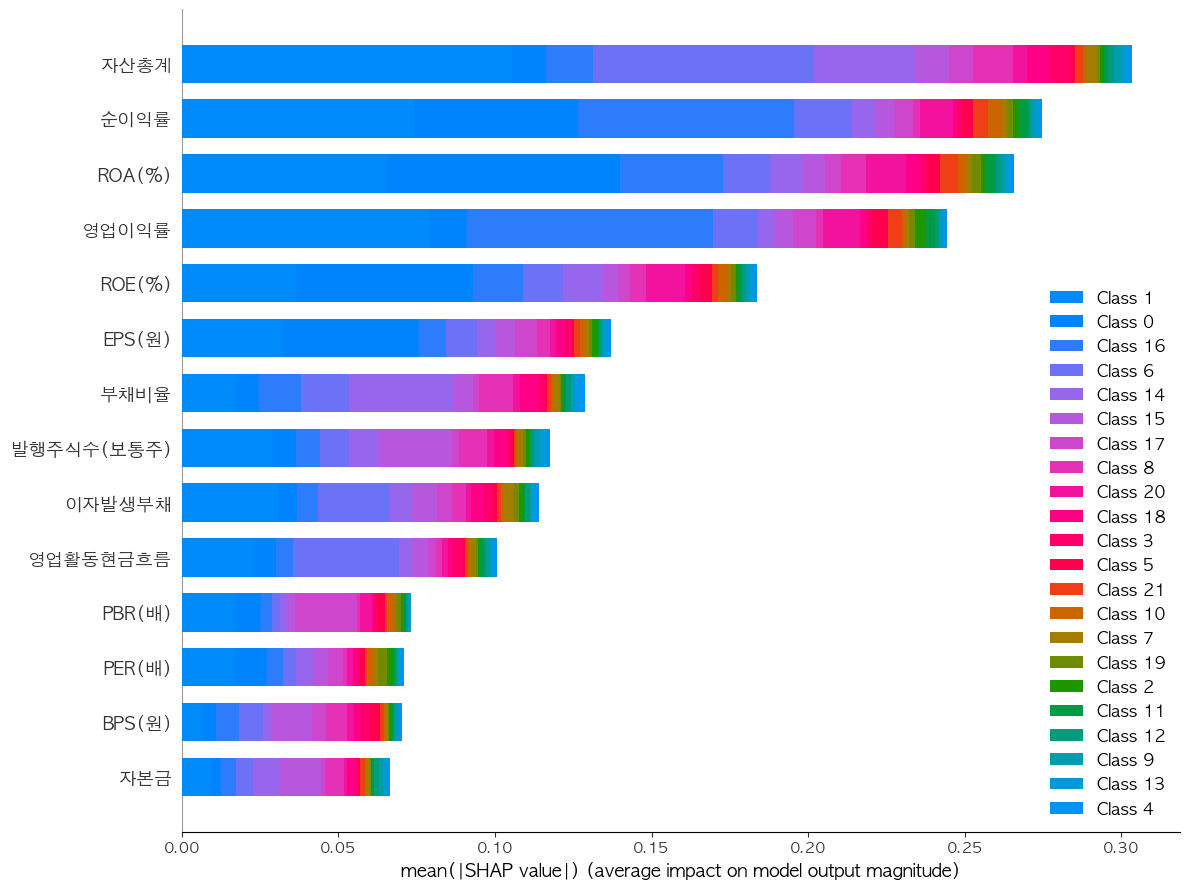

Ïã§Ï†ú ÏÇ¨Ïö©Îêú ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò: 22


In [30]:
best_method = min(dbi_dict, key=lambda k: dbi_dict[k][1])
best_k_method = dbi_dict[best_method][0]
best_dbi_value = dbi_dict[best_method][1]


if best_method == 'KMeans':
    final_labels = labels_kmeans_all[best_k_method]
elif best_method == 'GMM':
    final_labels = labels_gmm_all[best_k_method]
elif best_method == 'Spectral':
    final_labels = labels_spectral_all[best_k_method]


# Îç∞Ïù¥ÌÑ∞Ïóê ÎùºÎ≤® Î∂ÄÏ∞©
df_2022_2024['Cluster'] = final_labels

# ‚úÖ RandomForest ÌïôÏäµ
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_scaled_df_2022_2024, final_labels)

# ‚úÖ SHAP Î∂ÑÏÑù
explainer = shap.TreeExplainer(clf)
shap_values_2022_2024 = explainer.shap_values(X_scaled_df_2022_2024)

# ‚úÖ summary plot
shap.summary_plot(shap_values_2022_2024, X_scaled_df_2022_2024, plot_type="bar", show=False)
plt.gcf().set_size_inches(12, 9)
plt.tight_layout()
plt.show()

# ‚úÖ ÌôïÏù∏: Ïã§Ï†ú ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò
print("Ïã§Ï†ú ÏÇ¨Ïö©Îêú ÌÅ¥Îü¨Ïä§ÌÑ∞ Ïàò:", len(np.unique(final_labels)))


In [31]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ SHAP Í∞íÏùò ÌèâÍ∑† Íµ¨ÌïòÍ∏∞
cluster_shap_means_2022_2024 = {}
unique_clusters = np.unique(final_labels)

for cluster_id in unique_clusters:
    # ÌòÑÏû¨ ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÏÜçÌïú Ïù∏Îç±Ïä§ Ï∂îÏ∂ú
    cluster_indices = np.where(final_labels == cluster_id)[0]
    
    # Ìï¥Îãπ ÌÅ¥Îü¨Ïä§ÌÑ∞Ïóê ÎåÄÌïú SHAP Í∞íÎßå ÏÑ†ÌÉù
    cluster_shap_values = shap_values_2022_2024[cluster_indices]
    
    # SHAP Í∞íÏùò Ï†àÎåÄÍ∞í ÌèâÍ∑† Í≥ÑÏÇ∞
    cluster_mean_shap = np.abs(cluster_shap_values).mean(axis=0)
    
    # 2Ï∞®Ïõê Î∞∞Ïó¥Ïù∏ Í≤ΩÏö∞ 1Ï∞®ÏõêÏúºÎ°ú Î≥ÄÌôò (Ï≤´ Î≤àÏß∏ Ï∞®ÏõêÎßå ÏÇ¨Ïö©ÌïòÍ±∞ÎÇò Ï†ÅÏ†àÌûà Ï≤òÎ¶¨)
    if len(cluster_mean_shap.shape) > 1:
        # Ï∞®ÏõêÏù¥ (14, 4)ÏôÄ Í∞ôÏù¥ 2Ï∞®ÏõêÏù∏ Í≤ΩÏö∞, Ï≤´ Î≤àÏß∏ Ï∞®ÏõêÎßå ÏÇ¨Ïö©ÌïòÍ±∞ÎÇò ÌèâÌÉÑÌôî
        cluster_mean_shap = cluster_mean_shap.flatten() if cluster_mean_shap.size == len(X_scaled_df_2022_2024.columns) else cluster_mean_shap[:, 0]
    
    # Í≤∞Í≥º Ï†ÄÏû•
    cluster_shap_means_2022_2024[cluster_id] = cluster_mean_shap

# Î™®Îì† ÌÅ¥ÎûòÏä§Ïóê ÎåÄÌïú ÌäπÏÑ± Ï§ëÏöîÎèÑÎ•º DataFrameÏúºÎ°ú Î≥ÄÌôò
feature_importance_df = pd.DataFrame(index=X_scaled_df_2022_2024.columns)

# Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ Ï§ëÏöîÎèÑ Ï∂îÍ∞Ä
for cluster_id in unique_clusters:
    shap_arr = cluster_shap_means_2022_2024[cluster_id]
    # cluster_shap_means[cluster_id]Ïùò Í∏∏Ïù¥Í∞Ä X_raw.columnsÏôÄ ÏùºÏπòÌïòÎäîÏßÄ ÌôïÏù∏
    if len(shap_arr) != len(X_scaled_df_2022_2024.columns):
        print(f"Í≤ΩÍ≥†: ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster_id}Ïùò SHAP Í∞í Í∏∏Ïù¥({len(shap_arr)})Í∞Ä ÌäπÏÑ± Ïàò({len(X_scaled_df_2022_2024.columns)})ÏôÄ ÏùºÏπòÌïòÏßÄ ÏïäÏäµÎãàÎã§.")
        continue
    
    feature_importance_df[f'Class {cluster_id}'] = shap_arr

# Í≤∞Í≥º Ï∂úÎ†• - Í∞Å ÌÅ¥ÎûòÏä§Î≥ÑÎ°ú ÎÇ¥Î¶ºÏ∞®Ïàú Ï†ïÎ†¨Ìï¥ÏÑú Î≥¥Ïó¨Ï£ºÍ∏∞
print("Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ ÌäπÏÑ± Ï§ëÏöîÎèÑ (SHAP Í∞í ÌèâÍ∑†):")
display(feature_importance_df)

# Í∞Å ÌÅ¥ÎûòÏä§Î≥ÑÎ°ú Ï§ëÏöî ÌäπÏÑ± ÏàúÏúÑ ÌôïÏù∏
for cluster_id in unique_clusters:
    col = f'Class {cluster_id}'
    if col not in feature_importance_df.columns:
        print(f"\nClass {cluster_id}Ïóê ÎåÄÌïú ÌäπÏÑ± Ï§ëÏöîÎèÑÎ•º Í≥ÑÏÇ∞Ìï† Ïàò ÏóÜÏäµÎãàÎã§.")
        continue
        
    print(f"\nClass {cluster_id}Ïóê Ï§ëÏöîÌïú ÌäπÏÑ± ÏàúÏúÑ:")
    sorted_feats = feature_importance_df[col].sort_values(ascending=False)
    for i, (feature, importance) in enumerate(sorted_feats.items(), 1):
        print(f"{i}. {feature}: {importance:.6f}")

Í∞Å ÌÅ¥ÎûòÏä§Î≥Ñ ÌäπÏÑ± Ï§ëÏöîÎèÑ (SHAP Í∞í ÌèâÍ∑†):


Class 0   Class 1   Class 2   Class 3   Class 4   Class 5  \
ÏûêÏÇ∞Ï¥ùÍ≥Ñ        0.023723  0.002001  0.002372  0.066170  0.031621  0.002247   
ÏûêÎ≥∏Í∏à         0.007148  0.001378  0.001534  0.001881  0.007704  0.000231   
ÏòÅÏóÖÌôúÎèôÌòÑÍ∏àÌùêÎ¶Ñ    0.014675  0.001772  0.001042  0.049322  0.000766  0.000865   
Ïù¥ÏûêÎ∞úÏÉùÎ∂ÄÏ±Ñ      0.012674  0.001597  0.006997  0.041108  0.015975  0.001358   
ÏòÅÏóÖÏù¥ÏùµÎ•†       0.032147  0.005782  0.018850  0.007369  0.007212  0.014059   
ÏàúÏù¥ÏùµÎ•†        0.134785  0.036541  0.034572  0.042860  0.021127  0.028589   
ROE(%)      0.144814  0.039166  0.036642  0.050607  0.032737  0.031580   
ROA(%)      0.189726  0.057156  0.056753  0.064134  0.021484  0.045871   
Î∂ÄÏ±ÑÎπÑÏú®        0.017608  0.002013  0.000676  0.002076  0.022527  0.002028   
EPS(Ïõê)      0.110246  0.030186  0.046941  0.041416  0.021133  0.022728   
PER(Î∞∞)      0.031514  0.004054  0.013302  0.016420  0.001384  0.002058   
BPS(Ïõê)      0.011653  0.001893  0.005415  0.013180  0.002013  0.000394   
PBR(Î∞∞)      0.018643  0.003264  0.002301  0.003190  0.001193  0.020908   
Î∞úÌñâÏ£ºÏãùÏàò(Î≥¥ÌÜµÏ£º)  0.016548  0.002017  0.004689  0.002890  0.026549  0.001182   

             Class 6   Class 7   Class 8   Class 9  ...  Class 12  Class 13  \
ÏûêÏÇ∞Ï¥ùÍ≥Ñ        0.017081  0.021477  0.027382  0.013202  ...  0.030722  0.094701   
ÏûêÎ≥∏Í∏à         0.002422  0.001207  0.007722  0.002176  ...  0.007752  0.035204   
ÏòÅÏóÖÌôúÎèôÌòÑÍ∏àÌùêÎ¶Ñ    0.016634  0.002753  0.005930  0.015964  ...  0.002577  0.050926   
Ïù¥ÏûêÎ∞úÏÉùÎ∂ÄÏ±Ñ      0.006466  0.016578  0.007521  0.001571  ...  0.014760  0.067602   
ÏòÅÏóÖÏù¥ÏùµÎ•†       0.005641  0.005248  0.010186  0.007019  ...  0.009940  0.022688   
ÏàúÏù¥ÏùµÎ•†        0.036223  0.029525  0.030373  0.031706  ...  0.022983  0.091262   
ROE(%)      0.039659  0.029850  0.036820  0.029269  ...  0.032266  0.074199   
ROA(%)      0.043994  0.043467  0.021189  0.043634  ...  0.021045  0.104449   
Î∂ÄÏ±ÑÎπÑÏú®        0.004211  0.003213  0.024413  0.002212  ...  0.022142  0.045884   
EPS(Ïõê)      0.033750  0.024829  0.022335  0.025132  ...  0.021088  0.056088   
PER(Î∞∞)      0.007149  0.003708  0.002212  0.001425  ...  0.001134  0.017190   
BPS(Ïõê)      0.002625  0.000002  0.000739  0.001221  ...  0.002004  0.006463   
PBR(Î∞∞)      0.003375  0.002556  0.002339  0.002504  ...  0.001082  0.002985   
Î∞úÌñâÏ£ºÏãùÏàò(Î≥¥ÌÜµÏ£º)  0.002012  0.000206  0.012204  0.000575  ...  0.025933  0.070752   

            Class 14  Class 15  Class 16  Class 17  Class 18  Class 19  \
ÏûêÏÇ∞Ï¥ùÍ≥Ñ        0.019681  0.004120  0.002841  0.005360  0.035047  0.009308   
ÏûêÎ≥∏Í∏à         0.001685  0.008517  0.000627  0.003965  0.004555  0.010783   
ÏòÅÏóÖÌôúÎèôÌòÑÍ∏àÌùêÎ¶Ñ    0.005228  0.006227  0.001189  0.004067  0.012091  0.003864   
Ïù¥ÏûêÎ∞úÏÉùÎ∂ÄÏ±Ñ      0.004429  0.004891  0.002025  0.004643  0.018557  0.039294   
ÏòÅÏóÖÏù¥ÏùµÎ•†       0.007493  0.008989  0.012904  0.008799  0.010459  0.001033   
ÏàúÏù¥ÏùµÎ•†        0.031951  0.045455  0.035654  0.041906  0.025715  0.069327   
ROE(%)      0.036739  0.050597  0.037082  0.052499  0.031296  0.047426   
ROA(%)      0.033882  0.059467  0.054391  0.080475  0.022083  0.116947   
Î∂ÄÏ±ÑÎπÑÏú®        0.020280  0.010532  0.002660  0.002670  0.025840  0.005576   
EPS(Ïõê)      0.028874  0.039847  0.029889  0.032321  0.023194  0.061398   
PER(Î∞∞)      0.001704  0.013046  0.002107  0.018717  0.000445  0.149914   
BPS(Ïõê)      0.001892  0.018424  0.001756  0.010491  0.002163  0.001473   
PBR(Î∞∞)      0.002718  0.003561  0.003408  0.058420  0.002290  0.030944   
Î∞úÌñâÏ£ºÏãùÏàò(Î≥¥ÌÜµÏ£º)  0.002629  0.043770  0.001718  0.004667  0.003537  0.012421   

            Class 20  Class 21  
ÏûêÏÇ∞Ï¥ùÍ≥Ñ        0.003260  0.003923  
ÏûêÎ≥∏Í∏à         0.000672  0.000279  
ÏòÅÏóÖÌôúÎèôÌòÑÍ∏àÌùêÎ¶Ñ    0.000859  0.000976  
Ïù¥ÏûêÎ∞úÏÉùÎ∂ÄÏ±Ñ      0.002757  0.001553  
ÏòÅÏóÖÏù¥ÏùµÎ•†       0.013585  0.013077  
ÏàúÏù¥ÏùµÎ•†        0.033374  0.035421  
ROE(%)      0.034287  0.037568  
ROA(%


Class 0Ïóê Ï§ëÏöîÌïú ÌäπÏÑ± ÏàúÏúÑ:
1. ROA(%): 0.189726
2. ROE(%): 0.144814
3. ÏàúÏù¥ÏùµÎ•†: 0.134785
4. EPS(Ïõê): 0.110246
5. ÏòÅÏóÖÏù¥ÏùµÎ•†: 0.032147
6. PER(Î∞∞): 0.031514
7. ÏûêÏÇ∞Ï¥ùÍ≥Ñ: 0.023723
8. PBR(Î∞∞): 0.018643
9. Î∂ÄÏ±ÑÎπÑÏú®: 0.017608
10. Î∞úÌñâÏ£ºÏãùÏàò(Î≥¥ÌÜµÏ£º): 0.016548
11. ÏòÅÏóÖÌôúÎèôÌòÑÍ∏àÌùêÎ¶Ñ: 0.014675
12. Ïù¥ÏûêÎ∞úÏÉùÎ∂ÄÏ±Ñ: 0.012674
13. BPS(Ïõê): 0.011653
14. ÏûêÎ≥∏Í∏à: 0.007148

Class 1Ïóê Ï§ëÏöîÌïú ÌäπÏÑ± ÏàúÏúÑ:
1. ROA(%): 0.057156
2. ROE(%): 0.039166
3. ÏàúÏù¥ÏùµÎ•†: 0.036541
4. EPS(Ïõê): 0.030186
5. ÏòÅÏóÖÏù¥ÏùµÎ•†: 0.005782
6. PER(Î∞∞): 0.004054
7. PBR(Î∞∞): 0.003264
8. Î∞úÌñâÏ£ºÏãùÏàò(Î≥¥ÌÜµÏ£º): 0.002017
9. Î∂ÄÏ±ÑÎπÑÏú®: 0.002013
10. ÏûêÏÇ∞Ï¥ùÍ≥Ñ: 0.002001
11. BPS(Ïõê): 0.001893
12. ÏòÅÏóÖÌôúÎèôÌòÑÍ∏àÌùêÎ¶Ñ: 0.001772
13. Ïù¥ÏûêÎ∞úÏÉùÎ∂ÄÏ±Ñ: 0.001597
14. ÏûêÎ≥∏Í∏à: 0.001378

Class 2Ïóê Ï§ëÏöîÌïú ÌäπÏÑ± ÏàúÏúÑ:
1. ROA(%): 0.056753
2. EPS(Ïõê): 0.046941
3. ROE(%): 0.036642
4. ÏàúÏù¥ÏùµÎ•†: 0.034572
5. ÏòÅÏóÖÏù¥ÏùµÎ•†: 0.018850
6. PER(Î∞∞): 0.013302
7. Ï

### ÏúÑÏóê Í≤∞Í≥ºÎ•º Î≥¥Î©¥ Í∞Å class Î≥ÑÎ°ú Ïûò Ï£ºÏöîÌïú featureÍ∞Ä ÎÇòÏò® Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÎã§.

In [32]:
# ÌÅ¥Îü¨Ïä§ÌÑ∞Î≥Ñ Í∏∞ÏóÖ Î¶¨Ïä§Ìä∏Î•º Ï∂úÎ†•ÌïúÎã§.
for cluster_id in unique_clusters:
    print(f"[ÌÅ¥Îü¨Ïä§ÌÑ∞ {cluster_id}Ïóê ÏÜçÌïú Ï¢ÖÎ™©Îì§]:")
    stock_list = company_2022_2024[final_labels == cluster_id].values
    print(", ".join(stock_list))


[ÌÅ¥Îü¨Ïä§ÌÑ∞ 0Ïóê ÏÜçÌïú Ï¢ÖÎ™©Îì§]:
DL, GSÍ±¥ÏÑ§, GSÎ¶¨ÌÖåÏùº, HDÌòÑÎåÄÎØ∏Ìè¨, KGÎ™®ÎπåÎ¶¨Ìã∞, LGÎîîÏä§ÌîåÎ†àÏù¥, SKC, SKÎÑ§Ìä∏ÏõçÏä§, SKÎ∞îÏù¥Ïò§ÏÇ¨Ïù¥Ïñ∏Ïä§, ÎÑ∑ÎßàÎ∏î, ÎÖπÏã≠Ïûê, ÎÖπÏã≠ÏûêÌôÄÎî©Ïä§, ÎåÄÌïúÏú†Ìôî, ÎëêÏÇ∞, ÎëêÏÇ∞Ìì®ÏñºÏÖÄ, Î°ØÎç∞ÏáºÌïë, Î°ØÎç∞ÏßÄÏ£º, Î°ØÎç∞ÏºÄÎØ∏Ïπº, ÏÇºÏïÑÏïåÎØ∏ÎäÑ, ÏóòÏï§ÏóêÌîÑ, Ïú®Ï¥åÌôîÌïô, Ïù¥ÎßàÌä∏, ÏùºÏßÑÌïòÏù¥ÏÜîÎ£®Ïä§, Ïπ¥Ïπ¥Ïò§, ÏΩîÏä§Î™®ÌôîÌïô, ÌïúÌôîÏÜîÎ£®ÏÖò, ÌïúÌôîÏò§ÏÖò, ÌòÑÎåÄÍ±¥ÏÑ§, ÌòÑÎåÄÎ∞±ÌôîÏ†ê, Ìò∏ÌÖîÏã†Îùº, ÌõÑÏÑ±
[ÌÅ¥Îü¨Ïä§ÌÑ∞ 1Ïóê ÏÜçÌïú Ï¢ÖÎ™©Îì§]:
BGFÎ¶¨ÌÖåÏùº, CJÎåÄÌïúÌÜµÏö¥, DLÏù¥Ïï§Ïî®, GKL, HDÌòÑÎåÄÏù∏ÌîÑÎùºÏΩîÏñ¥, HDÌòÑÎåÄÏ§ëÍ≥µÏóÖ, HLÎßåÎèÑ, HSÌö®ÏÑ±Ï≤®Îã®ÏÜåÏû¨, KCC, LGÏÉùÌôúÍ±¥Í∞ï, LGÏù¥ÎÖ∏ÌÖç, LIGÎÑ•Ïä§Ïõê, LS, LS ELECTRIC, LXÏù∏ÌÑ∞ÎÇ¥ÏÖîÎÑê, PIÏ≤®Îã®ÏÜåÏû¨, SKÏïÑÏù¥Ïù¥ÌÖåÌÅ¨ÎÜÄÎ°úÏßÄ, SKÏºÄÎØ∏Ïπº, TCCÏä§Ìã∏, TKGÌú¥ÏºêÏä§, Í≥†Î†§ÏïÑÏó∞, Í∏àÌò∏ÏÑùÏú†ÌôîÌïô, ÎÜçÏã¨, ÎåÄÏÉÅ, ÎåÄÏõÖ, ÎåÄÏõÖÏ†úÏïΩ, ÎåÄÌïúÏ†ÑÏÑ†, ÎèôÏõêÏãúÏä§ÌÖúÏ¶à, Î°ØÎç∞Ïõ∞Ìë∏Îìú, Î°ØÎç∞Ï†ïÎ∞ÄÌôîÌïô, Î°ØÎç∞Ïπ†ÏÑ±, ÎØ∏Ïä§ÌÜ†ÌôÄÎî©Ïä§, ÏÇºÏÑ±ÏóêÏä§ÎîîÏó

### K-means ÌÅ¥Îü¨Ïä§ÌÑ∞ÎßÅ Í≤∞Í≥ºÏóê Ï¢ÖÎ™©Î™ÖÏùÑ Ìè¨Ìï®Ìï¥ÏÑú ÏãúÍ∞ÅÌôî

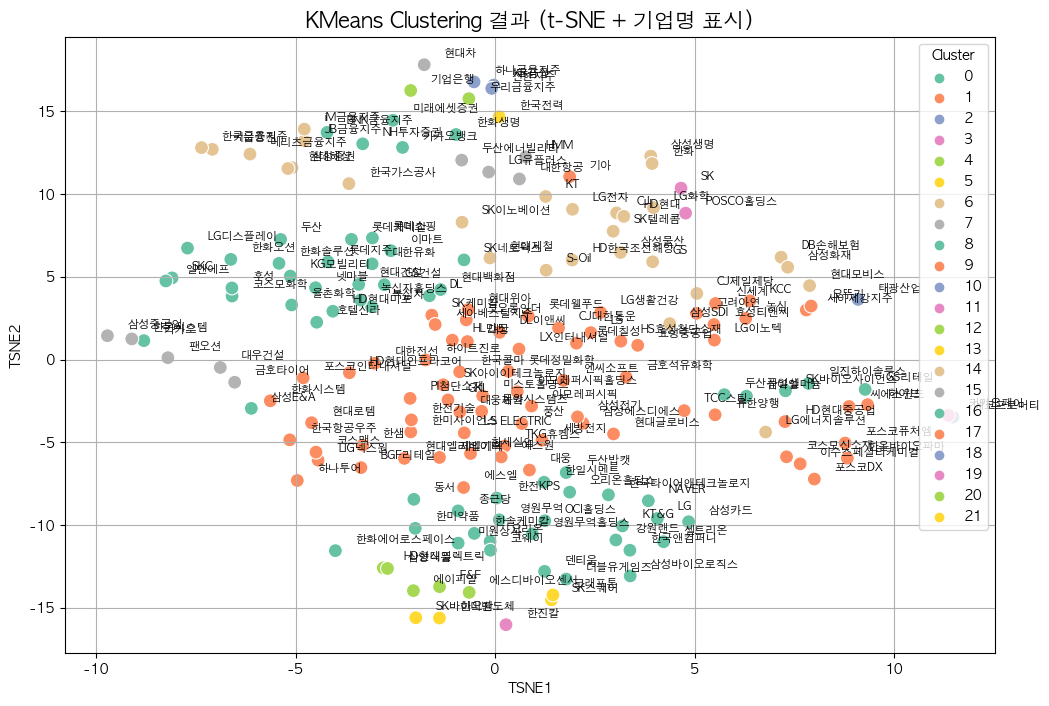

In [33]:
# t-SNE Ï†ÅÏö©
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled_df_2022_2024)

# Í≤∞Í≥º DataFrame ÏÉùÏÑ±
df_clustered = pd.DataFrame({
    'Í∏∞ÏóÖÎ™Ö': company_2022_2024.values,
    'Cluster': final_labels,
    'TSNE1': X_tsne[:, 0],
    'TSNE2': X_tsne[:, 1]
})

# ÏãúÍ∞ÅÌôî
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_clustered, x='TSNE1', y='TSNE2', hue='Cluster', palette='Set2', s=100)

# Í∏∞ÏóÖÎ™Ö ÎùºÎ≤® Ï∂îÍ∞Ä
for i in range(df_clustered.shape[0]):
    plt.text(df_clustered['TSNE1'][i]+0.5, df_clustered['TSNE2'][i]+0.5, df_clustered['Í∏∞ÏóÖÎ™Ö'][i], fontsize=8)

# Ï†úÎ™© Î∞è Ïä§ÌÉÄÏùº
plt.title("KMeans Clustering Í≤∞Í≥º (t-SNE + Í∏∞ÏóÖÎ™Ö ÌëúÏãú)", fontsize=15)
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


# Ìè¨Ìä∏Ìè¥Î¶¨Ïò§ ÏµúÏ†ÅÌôî

## Inter Cluster Portfolio vs. Random Sampling Portfolio

### Evaluation Using Sharpe Ratio, Sortino Ratio, and CVaR

In [49]:
#ÏûêÏÇ∞Îì§ Î™©Î°ù Î≥¥Í∏∞
import FinanceDataReader as fdr
from tqdm import tqdm
import datetime

# 1. ÏÑ∏ ÏúàÎèÑÏö∞ÏóêÏÑú Í∏∞ÏóÖÎ™Ö Ìï©ÏßëÌï© ÎßåÎì§Í∏∞
companies_2020_2022 = set(df_2020_2022['Í∏∞ÏóÖÎ™Ö_Í∑∏Î£π'])
companies_2021_2023 = set(df_2021_2023['Í∏∞ÏóÖÎ™Ö_Í∑∏Î£π'])
companies_2022_2024 = set(df_2022_2024['Í∏∞ÏóÖÎ™Ö_Í∑∏Î£π'])

all_companies = companies_2020_2022.union(companies_2021_2023).union(companies_2022_2024)
company_list = sorted(all_companies)

krx_listed = fdr.StockListing('KRX')

# Í∏∞ÏóÖÎ™ÖÍ≥º Ìã∞Ïª§ Îß§Ìïë
company_ticker_map = {}
for name in company_list:
    match = krx_listed[krx_listed['Name'] == name]
    if not match.empty:
        code = match.iloc[0]['Code']
        company_ticker_map[name] = code
    else:
        print(f"Îß§Ïπ≠ÎêòÏßÄ ÏïäÏùÄ Í∏∞ÏóÖÎ™Ö: {name}")

# Îß§Ìïë Í≤∞Í≥º ÌôïÏù∏
print("Îß§ÌïëÎêú Í∏∞ÏóÖ Ïàò:", len(company_ticker_map))


Îß§ÌïëÎêú Í∏∞ÏóÖ Ïàò: 195


In [53]:
start_date = '2020-01-01'
end_date = '2024-12-31'

# Ï¢ÖÍ∞Ä Îç∞Ïù¥ÌÑ∞Î•º Îã¥ÏùÑ ÎîïÏÖîÎÑàÎ¶¨
close_price_dict = {}
failed_companies = []

# tqdmÏúºÎ°ú ÏßÑÌñâ ÏÉÅÌô© Ï∂úÎ†•
for name, ticker in tqdm(company_ticker_map.items(), desc="üìà Ï¢ÖÍ∞Ä ÏàòÏßë Ï§ë"):
    try:
        df = fdr.DataReader(ticker, start=start_date, end=end_date)
        if 'Close' in df.columns and not df['Close'].isna().all():
            close_price_dict[name] = df['Close']
        else:
            failed_companies.append(name)
    except Exception as e:
        failed_companies.append(name)
        print(f"{name} Îç∞Ïù¥ÌÑ∞ ÏàòÏßë Ïã§Ìå®: {e}")

# ÎîïÏÖîÎÑàÎ¶¨Î•º ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏúºÎ°ú Í≤∞Ìï©
price_df = pd.DataFrame(close_price_dict)

üìà Ï¢ÖÍ∞Ä ÏàòÏßë Ï§ë: 100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 195/195 [00:31<00:00,  6.14it/s]


In [54]:
price_df

BGFÎ¶¨ÌÖåÏùº  BNKÍ∏àÏúµÏßÄÏ£º      CJ  CJÎåÄÌïúÌÜµÏö¥  CJÏ†úÏùºÏ†úÎãπ  DBÏÜêÌï¥Î≥¥Ìóò     DL    DLÏù¥Ïï§Ïî®  \
Date                                                                          
2020-01-02  168500     7470   93800  152500  245000   50100  79337      NaN   
2020-01-03  169000     7490   92600  148000  241000   50800  79337      NaN   
2020-01-06  166500     7350   90300  147000  233500   50200  75994      NaN   
2020-01-07  169500     7430   91100  147000  234000   49750  76988      NaN   
2020-01-08  169500     7330   90900  143500  229500   48550  74639      NaN   
...            ...      ...     ...     ...     ...     ...    ...      ...   
2024-12-23  107700    10630  107900   82500  265000  104700  33800  33100.0   
2024-12-24  107000    10730  102200   82200  264500  105600  33800  32950.0   
2024-12-26  105400    10590  102100   81200  261000  105300  33550  32400.0   
2024-12-27  102600    10420  101300   85700  255500  104100  32100  31800.0   
2024-12-30  102500    10340   99100   84400  255500  102800  31600  32150.0   

                F&F    GKL  ...  ÌòÑÎåÄÎ∞±ÌôîÏ†ê  ÌòÑÎåÄÏóòÎ¶¨Î≤†Ïù¥ÌÑ∞   ÌòÑÎåÄÏúÑÏïÑ   ÌòÑÎåÄÏ†úÏ≤†     ÌòÑÎåÄÏ∞®   ÌòÑÎåÄÌï¥ÏÉÅ  \
Date                        ...                                                
2020-01-02      NaN  19450  ...  85900    45083  48950  31200  118000  25900   
2020-01-03      NaN  19600  ...  85600    45083  47800  30800  116000  25450   
2020-01-06      NaN  19050  ...  84000    43416  46750  29650  116000  25350   
2020-01-07      NaN  20000  ...  88900    43682  46250  29500  115500  25600   
2020-01-08      NaN  19700  ...  87300    41348  44750  28200  112000  25050   
...             ...    ...  ...    ...      ...    ...    ...     ...    ...   
2024-12-23  54900.0  11350  ...  48800    59100  39350  21750  215000  25250   
2024-12-24  53700.0  11350  ...  49100    59500  39250  21700  216500  25600   
2024-12-26  54000.0  11340  ...  48150    58600  39000  21350  217500  25450   
2024-12-27  53600.0  11050  ...  48300    54000  38050  21100  215000  25100   
2024-12-30  54300.0  11040  ...  47250    52400  37800  21050  212000  24700   

             Ìò∏ÌÖîÏã†Îùº   Ìö®ÏÑ±Ï§ëÍ≥µÏóÖ   Ìö®ÏÑ±Ìã∞Ïï§Ïî®    ÌõÑÏÑ±  
Date                                     
2020-01-02  94000   26900  152500  7940  
2020-01-03  95300   27200  152000  8018  
2020-01-06  94900   26100  149500  7783  
2020-01-07  99400   26200  150500  7891  
2020-01-08  97300   24550  145000  7510  
...           ...     ...     ...   ...  
2024-12-23  38250  424500  239500  5110  
2024-12-24  38250  393000  245500  5000  
2024-12-26  37550  389500  241500  4945  
2024-12-27  36850  386500  233500  4870  
2024-12-30  36900  393000  239000  4975  

[1231 rows x 195 columns]

In [80]:
# 1. ÏùºÏùº Î°úÍ∑∏ ÏàòÏùµÎ•† Í≥ÑÏÇ∞
# # ÏàòÏùµÎ•†: log(P_t / P_{t-1})
# log_returns_df = np.log(price_df / price_df.shift(1)).dropna()

# # 2. Ïù∏Îç±Ïä§Î•º datetimeÏúºÎ°ú Î≥ÄÌôò (ÌïÑÏöî Ïãú)
# log_returns_df.index = pd.to_datetime(log_returns_df.index)

# 3. Ïó∞ÎèÑ ÌïÑÌÑ∞ÎßÅ Ìï®Ïàò
price_2020_2022 = price_df.loc["2020-01-01":"2022-12-31"]
price_2021_2023 = price_df.loc["2021-01-01":"2023-12-31"]
price_2022_2024 = price_df.loc["2022-01-01":"2024-12-31"]

# 5. Ï†ÄÏû•
price_df.to_csv("../csv/log_returns_total.csv")

price_2020_2022 = price_2020_2022.astype(float)
price_2021_2023 = price_2021_2023.astype(float)
price_2022_2024 = price_2022_2024.astype(float)

log_ret_2020_2022 = np.log(price_2020_2022 / price_2020_2022.shift(1))
log_ret_2020_2022 = log_ret_2020_2022.bfill()

log_ret_2021_2023 = np.log(price_2021_2023 / price_2021_2023.shift(1))
log_ret_2021_2023 = log_ret_2021_2023.bfill()

log_ret_2022_2024 = np.log(price_2022_2024 / price_2022_2024.shift(1))
log_ret_2022_2024 = log_ret_2022_2024.bfill()

log_ret_2020_2022.to_csv("../csv/log_return_2020_2022.csv", encoding="utf-8-sig")
log_ret_2021_2023.to_csv("../csv/log_return_2021_2023.csv", encoding="utf-8-sig")
log_ret_2022_2024.to_csv("../csv/log_return_2022_2024.csv", encoding="utf-8-sig")


In [83]:
log_ret_2020_2022

BGFÎ¶¨ÌÖåÏùº   BNKÍ∏àÏúµÏßÄÏ£º        CJ    CJÎåÄÌïúÌÜµÏö¥    CJÏ†úÏùºÏ†úÎãπ    DBÏÜêÌï¥Î≥¥Ìóò  \
Date                                                                     
2020-01-02  0.002963  0.002674 -0.012876 -0.029952 -0.016461  0.013875   
2020-01-03  0.002963  0.002674 -0.012876 -0.029952 -0.016461  0.013875   
2020-01-06 -0.014903 -0.018868 -0.025152 -0.006780 -0.031615 -0.011881   
2020-01-07  0.017858  0.010826  0.008820  0.000000  0.002139 -0.009005   
2020-01-08  0.000000 -0.013550 -0.002198 -0.024098 -0.019418 -0.024416   
...              ...       ...       ...       ...       ...       ...   
2022-12-23 -0.014423 -0.008242 -0.009479 -0.002144  0.000000  0.002941   
2022-12-26 -0.009732 -0.001380 -0.011976  0.002144 -0.011591 -0.002941   
2022-12-27  0.019371  0.000000  0.003608  0.014878 -0.005195  0.002941   
2022-12-28  0.016647 -0.086509  0.026068 -0.002112  0.011651 -0.031322   
2022-12-29 -0.007101 -0.021310 -0.016510 -0.009559 -0.020807 -0.010663   

                  DL     DLÏù¥Ïï§Ïî®       F&F       GKL  ...     ÌòÑÎåÄÎ∞±ÌôîÏ†ê   ÌòÑÎåÄÏóòÎ¶¨Î≤†Ïù¥ÌÑ∞  \
Date                                                ...                       
2020-01-02  0.000000 -0.007878  0.075838  0.007682  ... -0.003499  0.000000   
2020-01-03  0.000000 -0.007878  0.075838  0.007682  ... -0.003499  0.000000   
2020-01-06 -0.043050 -0.007878  0.075838 -0.028462  ... -0.018868 -0.037677   
2020-01-07  0.012995 -0.007878  0.075838  0.048665  ...  0.056695  0.006108   
2020-01-08 -0.030986 -0.007878  0.075838 -0.015114  ... -0.018162 -0.054912   
...              ...       ...       ...       ...  ...       ...       ...   
2022-12-23 -0.009725  0.000000 -0.017762 -0.010929  ... -0.018503 -0.019248   
2022-12-26  0.004874 -0.009530  0.024780 -0.005510  ...  0.001696  0.008795   
2022-12-27  0.009677  0.008174  0.027588  0.027250  ...  0.006757 -0.001753   
2022-12-28 -0.024372 -0.054369  0.003396  0.023906  ...  0.028218 -0.001756   
2022-12-29 -0.026668 -0.033506 -0.020549 -0.007905  ... -0.034974 -0.005286   

                ÌòÑÎåÄÏúÑÏïÑ      ÌòÑÎåÄÏ†úÏ≤†       ÌòÑÎåÄÏ∞®      ÌòÑÎåÄÌï¥ÏÉÅ      Ìò∏ÌÖîÏã†Îùº     Ìö®ÏÑ±Ï§ëÍ≥µÏóÖ  \
Date                                                                     
2020-01-02 -0.023774 -0.012903 -0.017094 -0.017527  0.013735  0.011091   
2020-01-03 -0.023774 -0.012903 -0.017094 -0.017527  0.013735  0.011091   
2020-01-06 -0.022211 -0.038053  0.000000 -0.003937 -0.004206 -0.041282   
2020-01-07 -0.010753 -0.005072 -0.004320  0.009814  0.046328  0.003824   
2020-01-08 -0.032970 -0.045068 -0.030772 -0.021719 -0.021353 -0.065048   
...              ...       ...       ...       ...       ...       ...   
2022-12-23 -0.026719 -0.010761 -0.009509 -0.019576  0.000000 -0.014982   
2022-12-26  0.003861  0.007698  0.006349  0.019576 -0.021291  0.018692   
2022-12-27 -0.001929  0.003063  0.000000 -0.013008  0.048187  0.035176   
2022-12-28 -0.013606 -0.020078 -0.025642 -0.014840  0.020299 -0.031480   
2022-12-29 -0.032822 -0.046297 -0.019673 -0.021831 -0.017890 -0.041437   

               Ìö®ÏÑ±Ìã∞Ïï§Ïî®        ÌõÑÏÑ±  
Date                            
2020-01-02 -0.003284  0.009776  
2020-01-03 -0.003284  0.009776  
2020-01-06 -0.016584 -0.029747  
2020-01-07  0.006667  0.013781  
2020-01-08 -0.037229 -0.049487  
...              ...       ...  
2022-12-23  0.020648 -0.047719  
2022-12-26  0.000000  0.004359  
2022-12-27  0.020230  0.013233  
2022-12-28 -0.028438 -0.031062  
2022-12-29 -0.039221 -0.036641  

[742 rows x 195 columns]

In [84]:
log_ret_2020_2022.index = pd.to_datetime(log_ret_2020_2022.index)

start_date = log_ret_2020_2022.index.min()
cutoff_date = start_date + pd.DateOffset(years=2)
end_date = log_ret_2020_2022.index.max()

returns_in_sample = log_ret_2020_2022.loc[start_date : cutoff_date - pd.DateOffset(days=1)]
returns_out_sample = log_ret_2020_2022.loc[cutoff_date : end_date]

returns_in_sample.shape, returns_out_sample.shape, cutoff_date

((496, 195), (246, 195), Timestamp('2022-01-02 00:00:00'))